# **Sabancı University CS210 Group Project - Spring 2022**

---

#### ***Heart Disease Prediction***

Hüseyin Alper Karadeniz, *28029*\
Ahmet Bilal Yıldız, *27925*\
Safa Abdullah Söğütlügil, *29214*\
Pelinsu Saraç, *28820*

## **Part 0 : Google Drive Connection and Data Import**
In this part, main data is imported from the drive folder and then opened up.

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open("./drive/My Drive/CS210/mainData.csv", "r") as f:
  df = pd.read_csv(f)

## **Part 1: Explatory Data Analysis**
In this part, data is analized in detail and being interpreted according to visualizations.

##### Dictionary creation for attributes by group and the Visualization of each attribute

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         303 non-null    int64  
 1   Age        303 non-null    int64  
 2   Sex        303 non-null    int64  
 3   ChestPain  303 non-null    object 
 4   RestBP     303 non-null    int64  
 5   Chol       303 non-null    int64  
 6   Fbs        303 non-null    int64  
 7   RestECG    303 non-null    int64  
 8   MaxHR      303 non-null    int64  
 9   ExAng      303 non-null    int64  
 10  Oldpeak    303 non-null    float64
 11  Slope      303 non-null    int64  
 12  Ca         299 non-null    float64
 13  Thal       301 non-null    object 
 14  AHD        303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         297 non-null    int64  
 1   Age        297 non-null    int64  
 2   Sex        297 non-null    int64  
 3   ChestPain  297 non-null    object 
 4   RestBP     297 non-null    int64  
 5   Chol       297 non-null    int64  
 6   Fbs        297 non-null    int64  
 7   RestECG    297 non-null    int64  
 8   MaxHR      297 non-null    int64  
 9   ExAng      297 non-null    int64  
 10  Oldpeak    297 non-null    float64
 11  Slope      297 non-null    int64  
 12  Ca         297 non-null    float64
 13  Thal       297 non-null    object 
 14  AHD        297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


In [ ]:
df.head()

,ID,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
# Stores the details of the quantitative attributes for the graphs
quantitativeAttributes = ["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]
quantitativeAttr = {
    "Age": ["#EE6C4D", "Age (in years)", [], []],
    "RestBP": ["#662C91", "Resting Blood Pressure (in mmHg)", [], []],
    "Chol": ["#17A398", "Serum Cholesterol (in mg/dL)", [], []],
    "MaxHR": ["#18842A", "Greatest Number of Beats per Minute During All-out Strenuous Exercise", [], []],
    "Oldpeak": ["#F29D68", "ST Depression Induced by Exercise Relative to Rest (in mm)", [], []]}

# Stores the details of the categorical attributes for the graphs
categoricalAttributes = ["Sex", "ChestPain", "Fbs", "RestECG", "ExAng", "Slope", "Ca", "Thal", "AHD"]
categoricalAttr = {
    "Sex": ["#235789", "Sex (Gender)", [0, 1], ["Female", "Male"]],
    "ChestPain": ["#C1292E", "Chest Pain Type", ["typical", "nontypical", "nonanginal", "asymptomatic"], ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"]],
    "Fbs": ["#F1D302", "Diabetic Check (Fasting Blood Sugar)", [1, 0], ["> 120 mg/dL", "<= 120 mg/dL"]],
    "RestECG": ["#5FB49C", "Resting Electrocardiogram Results", [0, 1, 2], ["Normal", "ST-T Abnormality", "LVH"]],
    "ExAng": ["#FF9F1C", "Exercise Induced Angina", [0, 1], ["No", "Yes"]],
    "Slope": ["#559CAD", "Slope of the Peak Exercise ST Segment", [1, 2, 3], ["Upsloping", "Flat", "Downsloping"]],
    "Ca": ["#5FAD41", "Number of Major Vessels Colored by Fluoroscopy", [0, 1, 2, 3], ["0", "1", "2", "3"]],
    "Thal": ["#FF6663", "Thallium Absorption", ["normal", "fixed", "reversable"], ["Normal", "Fixed Defect", "Reversible Defect"]],
    "AHD": ["#FF9FE5", "Acquired Heart Disease Check", ["No", "Yes"], ["No Disease", "Disease"]]}

# Stores the deatils of all attributes together
allAttributes = [*quantitativeAttributes, *categoricalAttributes]
allAttr = {**quantitativeAttr, **categoricalAttr}

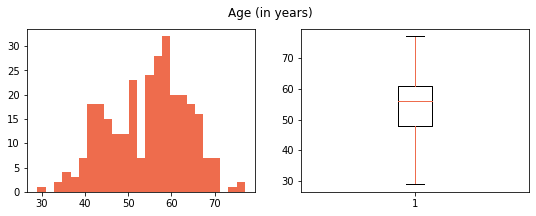

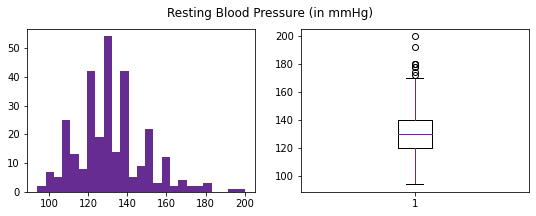

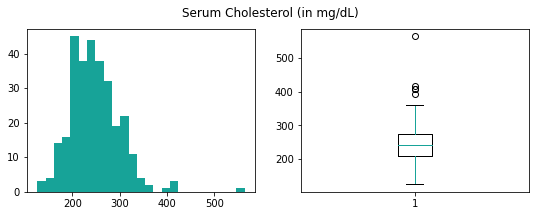

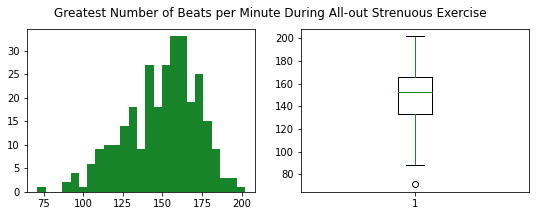

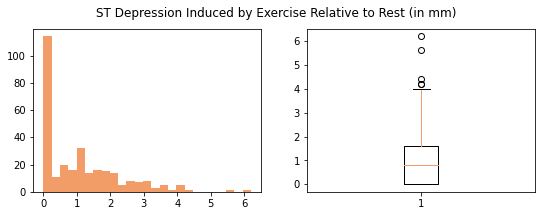

In [ ]:
# Plots the graphs of all quantitative attributes one by one
for idx in range(len(quantitativeAttributes)):
  attribute = quantitativeAttributes[idx] # Gets attribute
  color = quantitativeAttr[attribute][0] # Gets color
  description = quantitativeAttr[attribute][1] # Gets description
  # Plots two graphs in a row as a one-dimensional array
  fig, axs = plt.subplots(1, 2, figsize=(9, 3))
  axs[0].hist(df[attribute], bins=25, color=color) # Histogram
  axs[1].boxplot(df[attribute], whiskerprops=dict(color=color), medianprops=dict(color=color)) # Box Plot
  fig.suptitle(description, x=0.5, y=0.98)

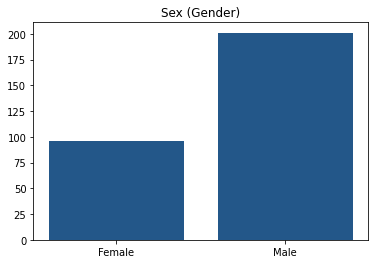

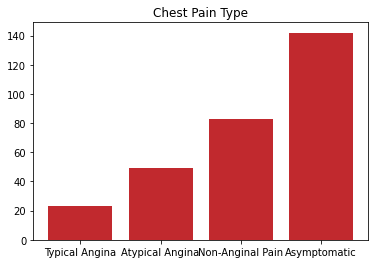

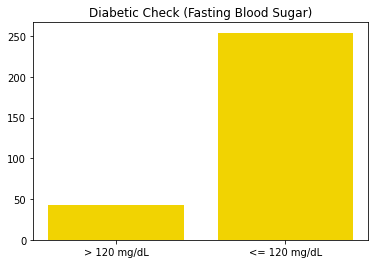

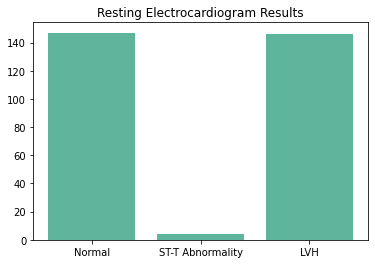

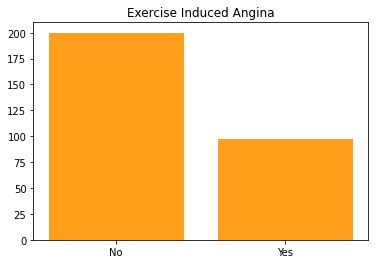

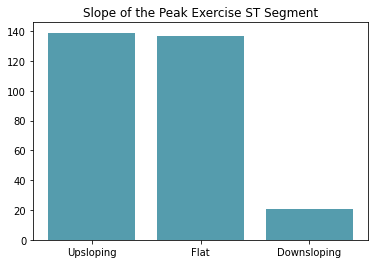

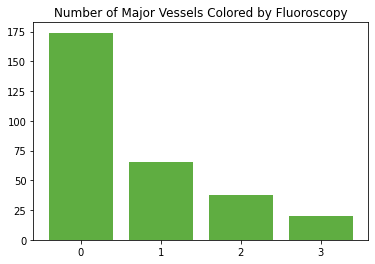

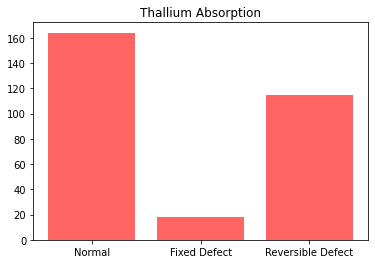

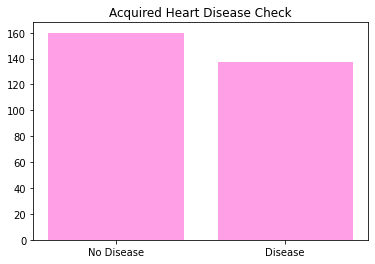

In [ ]:
# Plots the graphs of all categorical attributes one by one
for idx in range(len(categoricalAttributes)):
  attribute = categoricalAttributes[idx] # Gets attribute
  color = categoricalAttr[attribute][0] # Gets color
  description = categoricalAttr[attribute][1] # Gets description
  x = categoricalAttr[attribute][3] # Gets the x-axis titles
  y = [] # Gets the y-axis titles
  for value in categoricalAttr[attribute][2]:
    y.append(list(df[attribute]).count(value)) # Adds categories
  plt.bar(x, y, color=color)
  plt.title(description)
  plt.show()

##### Visualization of each attribute with respect to acquired heart disease

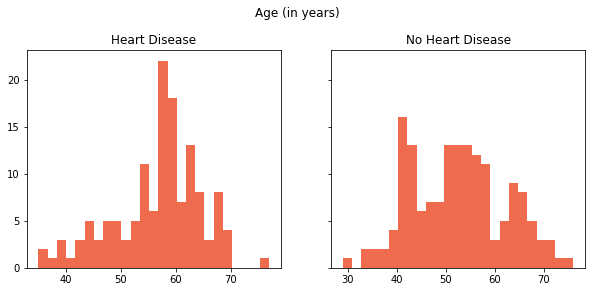

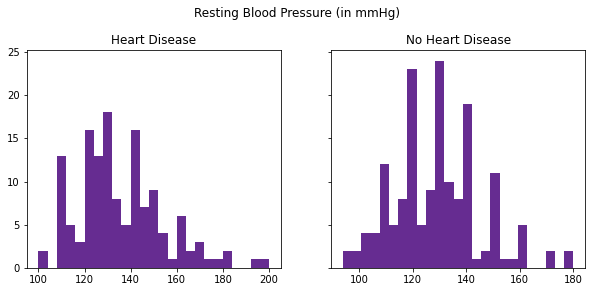

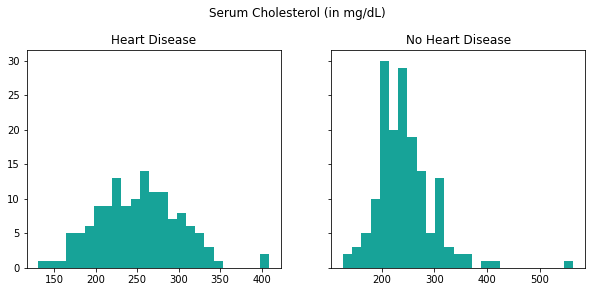

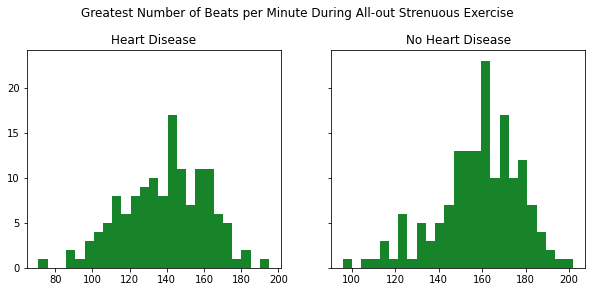

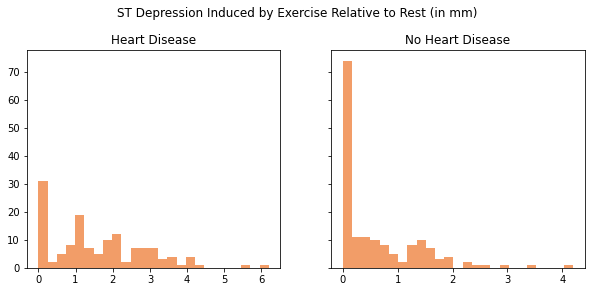

In [ ]:
# Plots the graphs of all quantitative attributes with heart disease and no heart disease
for idx in range(len(quantitativeAttributes)):
  attribute = quantitativeAttributes[idx] # Gets attribute
  color = quantitativeAttr[attribute][0] # Gets color
  description = quantitativeAttr[attribute][1] # Gets description

  fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
  axs[0].hist(df[df["AHD"] == "Yes"][attribute], bins=25, color=color)
  axs[0].set_title("Heart Disease")
  axs[1].hist(df[df["AHD"] == "No"][attribute], bins=25, color=color)
  axs[1].set_title("No Heart Disease")

  fig.suptitle(description, x=0.5, y=1.03)

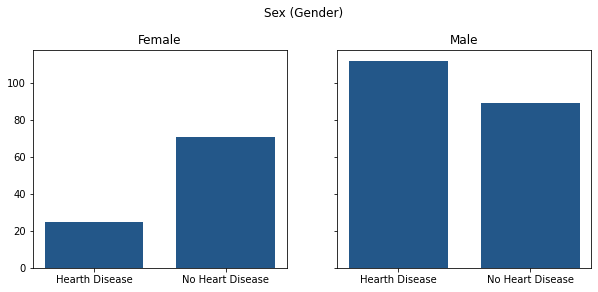

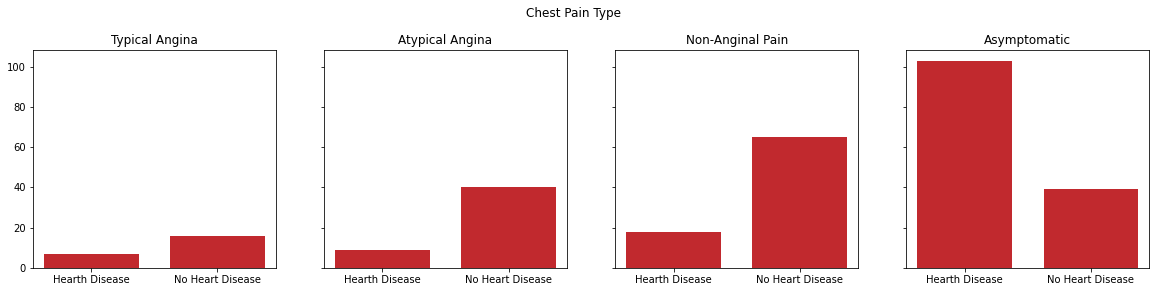

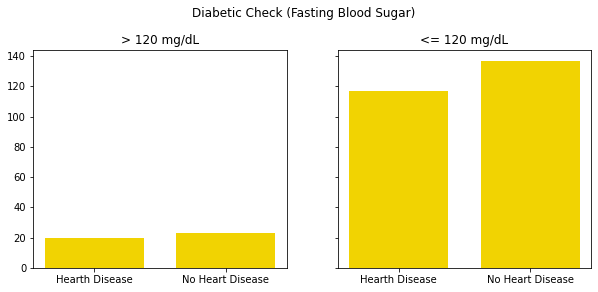

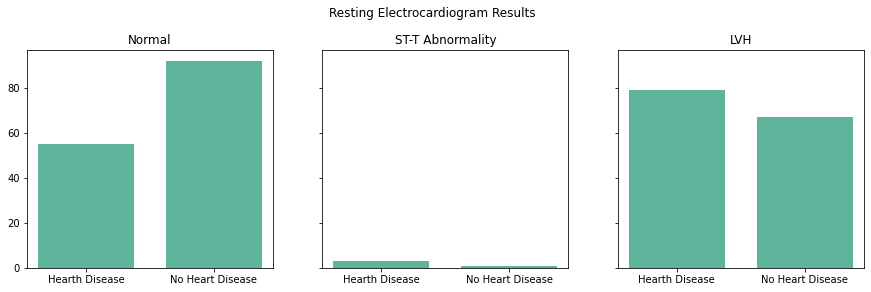

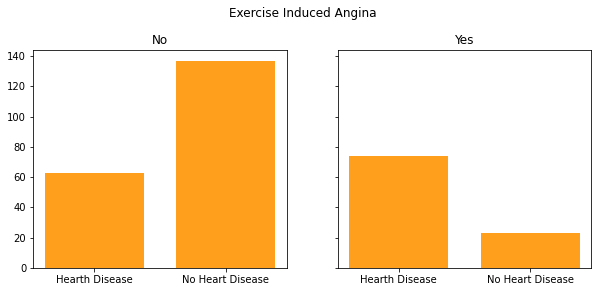

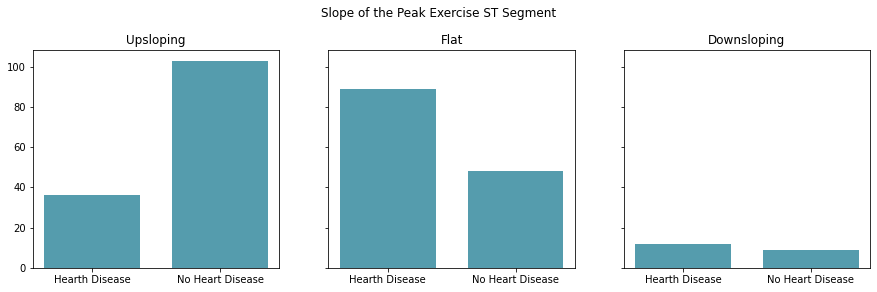

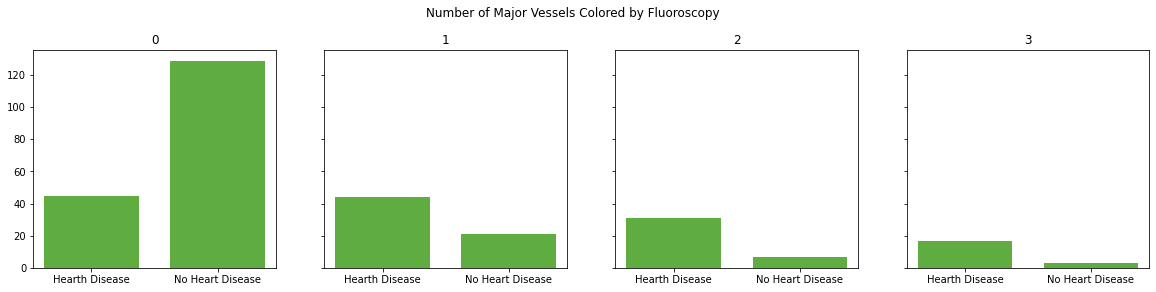

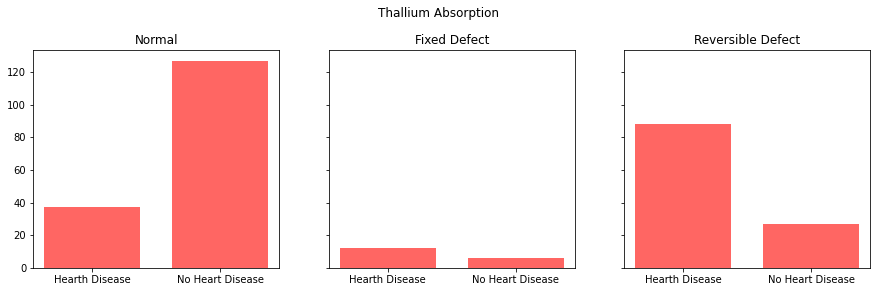

In [ ]:
# Plots the graphs of all categorical attributes with heart disease and no heart disease
for idx in range(len(categoricalAttributes)):
  attribute = categoricalAttributes[idx] # Gets attribute
  if(attribute == "AHD"):
    continue
  color = categoricalAttr[attribute][0] # Gets color
  description = categoricalAttr[attribute][1] # Gets description
  values = categoricalAttr[attribute][2] # Gets values
  valueDetails = categoricalAttr[attribute][3] # Gets value details

  fig, axs = plt.subplots(1, len(values), figsize=((len(values)*5), 4), sharey=True)
  x = ["Hearth Disease", "No Heart Disease"]

  for vIdx in range(len(values)):
    value = values[vIdx]
    y = [list(df[df[attribute] == value]["AHD"]).count("Yes"), list(df[df[attribute] == value]["AHD"]).count("No")]
    axs[vIdx].bar(x, y, width=0.75, color=color)
    axs[vIdx].set_title(valueDetails[vIdx])
  
  fig.suptitle(description, x=0.5, y=1.03)

##### Visualization of the relationship between some selected attributes and the final disease state with comments


Text(0.5, 0.98, 'Attribute Group: Age, Sex, Cholesterol')

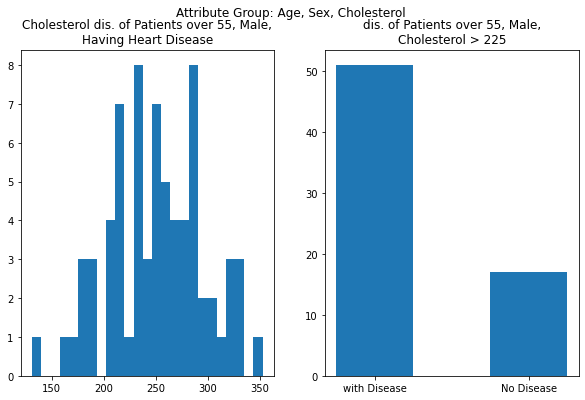

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

#Filtering dataframe step by step according to selected attributes

df_2 = df[df["Age"] >= 55][["Sex", "Chol", "AHD"]]
df_3 = df_2[df_2["Sex"] == 1][["Chol", "AHD"]]
df_4 = df_3[df_3["AHD"] == "Yes"]["Chol"]
df_4_alt = df_3[df_3["Chol"] >= 225]["AHD"] 
df_4_list = [list(df_4_alt).count("Yes"), list(df_4_alt).count("No")]

#Forming the graphs of filtered dataframe

axs[0].hist(df_4, bins=25)
axs[0].set_title("Cholesterol dis. of Patients over 55, Male,\nHaving Heart Disease")

axs[1].bar(["with Disease", "No Disease"], df_4_list, width=0.5)
axs[1].set_title("dis. of Patients over 55, Male,\nCholesterol > 225")

fig.suptitle("Attribute Group: Age, Sex, Cholesterol")

> In this figure, distribution of male heart disease patients over 55 with cholesterol levels over 225 mg/dL 
is depicted next to cholesterol distribution of male heart disease patients over 55. It can be observed that these attributes seem to increase the probability of heart disease for a patient.

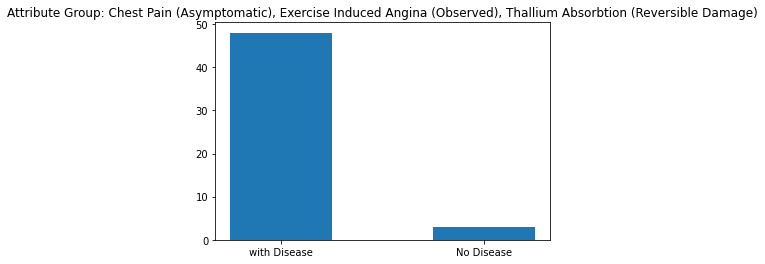

In [ ]:
#Filtering dataframe step by step according to selected attributes

df_2 = df[df["ChestPain"] == "asymptomatic"][["ExAng", "Thal", "AHD"]] 
df_3 = df_2[df_2["ExAng"] == 1][["Thal", "AHD"]] 

df_4_alt = df_3[df_3["Thal"] == "reversable"]["AHD"] 
df_4_list = [list(df_4_alt).count("Yes"), list(df_4_alt).count("No")]

#Forming the graphs of filtered dataframe

plt.bar(["with Disease", "No Disease"], df_4_list, width=0.5)
plt.title("Attribute Group: Chest Pain (Asymptomatic), Exercise Induced Angina (Observed), Thallium Absorbtion (Reversible Damage)")
plt.show()

>In this figure, distribution of heart disease among patients with asymptomatic chest pain, exercise induced angina and reversible thallium absorbtion damage is depicted. It can be observed that co-existance of these attributes seem to increase the probability of heart disease significantly.

Text(0.5, 0.98, 'Attribute Group: Chest Pain, Slope, Maximum Heart Rate')

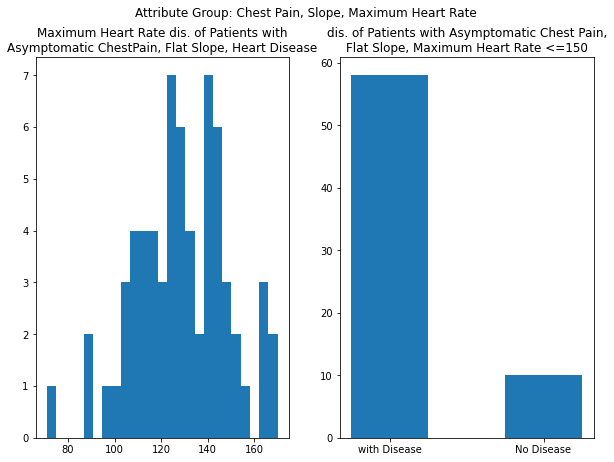

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 7))

#Filtering dataframe step by step according to selected attributes

df_2 = df[df["ChestPain"] == "asymptomatic"][["Slope", "MaxHR", "AHD"]] 
df_3 = df_2[df_2["Slope"] == 2][["MaxHR", "AHD"]] 
df_4 = df_3[df_3["AHD"] == "Yes"]["MaxHR"]
df_4_alt = df_3[df_3["MaxHR"] <= 150]["AHD"] 
df_4_list = [list(df_4_alt).count("Yes"), list(df_4_alt).count("No")]

#Forming the graphs of filtered dataframe

axs[0].hist(df_4, bins=25)
axs[0].set_title("Maximum Heart Rate dis. of Patients with\nAsymptomatic ChestPain, Flat Slope, Heart Disease")

axs[1].bar(["with Disease", "No Disease"], df_4_list, width=0.5)
axs[1].set_title("dis. of Patients with Asymptomatic Chest Pain,\nFlat Slope, Maximum Heart Rate <=150")

fig.suptitle("Attribute Group: Chest Pain, Slope, Maximum Heart Rate")

>In this figure, distribution of patients with asymptomatic chest pain, flat slope of peak exercise ST segment and maximum heart rate lower than or equal to 150 bpm is depicted next to maximum heart rate distribution of patients with heart disease, asymptomatic chest pain and flat slope. It can be observed that these attributes could be raising chances of heart disease.

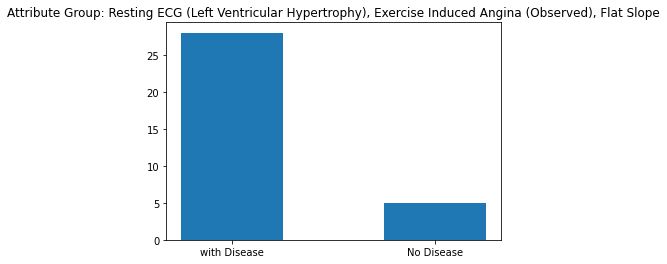

In [ ]:
#Filtering dataframe step by step according to selected attributes

df_2 = df[df["RestECG"] == 2][["ExAng", "Slope", "AHD"]] 
df_3 = df_2[df_2["ExAng"] == 1][["Slope", "AHD"]]

df_4_alt = df_3[df_3["Slope"] == 2]["AHD"] 
df_4_list = [list(df_4_alt).count("Yes"), list(df_4_alt).count("No")]

#Forming the graphs of filtered dataframe

plt.bar(["with Disease", "No Disease"], df_4_list, width=0.5)
plt.title("Attribute Group: Resting ECG (Left Ventricular Hypertrophy), Exercise Induced Angina (Observed), Flat Slope")
plt.show()

>In this figure, distribution of heart disease among patients with left ventrivular hypertrophy (as a result of resting ECG), exercise induced angina and flat slope of peak exercise ST segment is depicted. It can be observed that these attributes create a significant difference in terms of probability of heart disease.

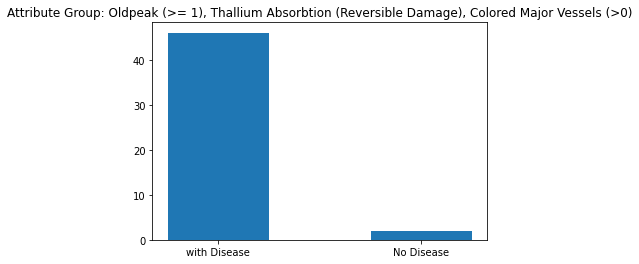

In [ ]:
#Filtering dataframe step by step according to selected attributes

df_2 = df[df["Oldpeak"] >= 1][["Ca", "Thal", "AHD"]]
df_3 = df_2[df_2["Ca"] >= 1][["Thal", "AHD"]]

df_4_alt = df_3[df_3["Thal"] == "reversable"]["AHD"] 
df_4_list = [list(df_4_alt).count("Yes"), list(df_4_alt).count("No")]

#Forming the graphs of filtered dataframe

plt.bar(["with Disease", "No Disease"], df_4_list, width=0.5)
plt.title("Attribute Group: Oldpeak (>= 1), Thallium Absorbtion (Reversible Damage), Colored Major Vessels (>0)")
plt.show()

>In this figure, distribution of heart disease among patients with oldpeak larger than or equal to 1, reversible thallium absorbtion damage and at least one major vessel colored by fluoroscopy is depicted. It can be observed that  these variables together almost always co-exist with heart disease in sample.

Text(0.5, 0.98, 'Attribute Group: Resting ECG, Thallium Absorbtion, Age')

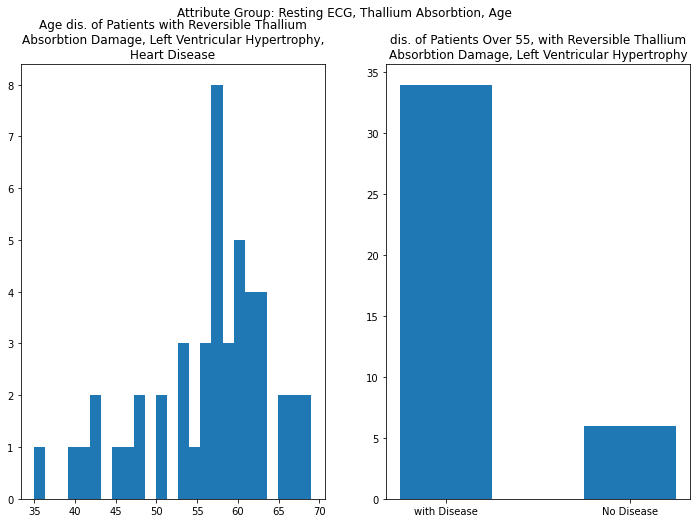

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 8))

#Filtering dataframe step by step according to selected attributes

df_2 = df[df["RestECG"] == 2][["Thal", "Age", "AHD"]] 
df_3 = df_2[df_2["Thal"] == "reversable"][["Age", "AHD"]] 
df_4 = df_3[df_3["AHD"] == "Yes"]["Age"]
df_4_alt = df_3[df_3["Age"] >= 55]["AHD"] 
df_4_list = [list(df_4_alt).count("Yes"), list(df_4_alt).count("No")]

#Forming the graphs of filtered dataframe

axs[0].hist(df_4, bins=25)
axs[0].set_title("Age dis. of Patients with Reversible Thallium\nAbsorbtion Damage, Left Ventricular Hypertrophy,\nHeart Disease")

axs[1].bar(["with Disease", "No Disease"], df_4_list, width=0.5)
axs[1].set_title("dis. of Patients Over 55, with Reversible Thallium\nAbsorbtion Damage, Left Ventricular Hypertrophy")

fig.suptitle("Attribute Group: Resting ECG, Thallium Absorbtion, Age")

>In this figure, distribution of patients over 55 with left ventricular hypertrophy and reversible thallium absorbtion damage is depicted next to age distribution of patients with reversible thallium absorbtion damage, left ventricular hypertrophy and hear disease. It can be observed that these three attributes have increasing effect on probability of observing heart disease among sample.

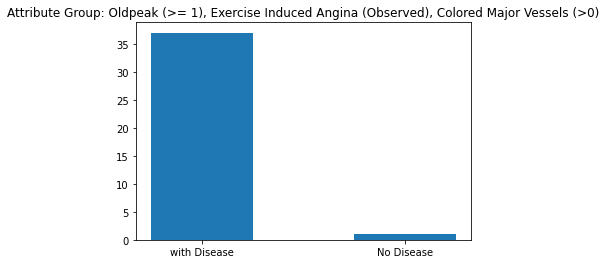

In [ ]:
#Filtering dataframe step by step according to selected attributes

df_2 = df[df["Oldpeak"] >= 1][["Ca", "ExAng", "AHD"]]
df_3 = df_2[df_2["Ca"] >= 1][["ExAng", "AHD"]]

df_4_alt = df_3[df_3["ExAng"] == 1]["AHD"] 
df_4_list = [list(df_4_alt).count("Yes"), list(df_4_alt).count("No")]

#Forming the graphs of filtered dataframe

plt.bar(["with Disease", "No Disease"], df_4_list, width=0.5)
plt.title("Attribute Group: Oldpeak (>= 1), Exercise Induced Angina (Observed), Colored Major Vessels (>0)")
plt.show()

>In this figure, distribution of heart disease among patients with oldpeak larger than or equal to 1, at least 1 major vessel colored by fluoroscopy and exercise induced angina is depicted. This group is significant as it yields the highest conditional probability of heart disease among sample.

Text(0.5, 0.98, 'Attribute Group: Maximum Heart Rate, Cholesterol, Resting ECG')

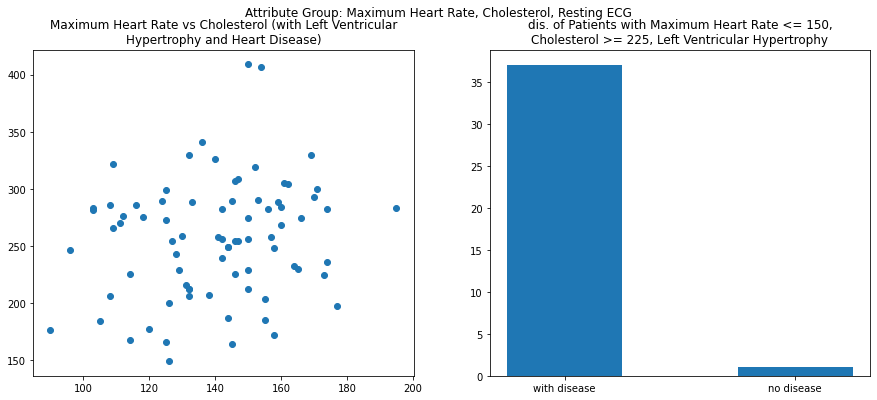

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))

#Filtering dataframe step by step according to selected attributes

df_2 = df[df["RestECG"] == 2][["MaxHR", "Chol", "AHD"]] 
df_3_alt= df_2[df_2["AHD"] == "Yes"][["MaxHR", "Chol"]]
df_3 = df_2[df_2["MaxHR"] <= 150][["Chol", "AHD"]]
df_4 = df_3[df_3["Chol"] >= 225]["AHD"]
df_4_list = [list(df_4_alt).count("Yes"), list(df_4_alt).count("No")]

#Forming the graphs of filtered dataframe

axs[0].scatter(df_3_alt["MaxHR"], df_3_alt["Chol"])
axs[0].set_title("Maximum Heart Rate vs Cholesterol (with Left Ventricular\nHypertrophy and Heart Disease)")

axs[1].bar(["with disease", "no disease"], df_4_list, width=0.5)
axs[1].set_title("dis. of Patients with Maximum Heart Rate <= 150,\nCholesterol >= 225, Left Ventricular Hypertrophy")

fig.suptitle("Attribute Group: Maximum Heart Rate, Cholesterol, Resting ECG")

>In this figure, distribution of patients with left ventricular hypertrophy, maximum heart rate lower than or equal to 150 and cholesterol levels over 225 mg/dL is depicted next to scatterplot of maximum heart rate and cholesterol while ventricular hypertrophy and heart disease are observed. It can be observed that heart rate and cholesterol doesn't seem to have a correlation. However, co-existance of these factor seem to increase probability of observing heart disease among sample.

##### Analysis of Chol, Fbs and ExAng values with respect to age and sex

In [ ]:
# Plots scatter plot graph according to parameters for one categorical variable
def drawScatter(category, parameter1, parameter2):
  description = categoricalAttr[category][1] # Gets description
  values = categoricalAttr[category][2] # Gets values
  valueDetails = categoricalAttr[category][3] # Gets value details
  fig, axs = plt.subplots(1, len(values), figsize=((len(values)*4), (len(values)*2)), sharey = True, sharex = True, constrained_layout=True)

  # Plots the scatterplot graphs
  for vIdx in range(len(values)):
    color = "#C90076" if vIdx % 2 == 0 else "#0677D7"
    value = values[vIdx]
    axs[vIdx].scatter(df[df[category] == value][parameter1], df[df[category] == value][parameter2], color=color)
    axs[vIdx].title.set_text(valueDetails[vIdx])
  
  # Draws the grids for the scatterplot graphs
  for i in range(len(values)):
    axs[i].grid(True)

  fig.suptitle(parameter1 + " vs. " + parameter2 + " with respect to " + category, x=0.5, y=1.08)

In [ ]:
# Plots histograms for a given parameter with two categorical variables
def drawHist(category1, category2, parameter):
  description1 = categoricalAttr[category1][1] # Description of the first category
  values1 = categoricalAttr[category1][2] # Values of the first category
  valueDetails1 = categoricalAttr[category1][3] # Value details of the first category

  description2 = categoricalAttr[category2][1] # Description of the second category
  values2 = categoricalAttr[category2][2] # Values of the second category
  valueDetails2 = categoricalAttr[category2][3] # Value details of the second category

  fig, axs = plt.subplots(len(values1), len(values2), figsize=((len(values2)*4), (len(values1)*3)), sharey = True, sharex = True, constrained_layout=True)

  # Plots the histograms
  for vIdx1 in range(len(values1)):
    for vIdx2 in range(len(values2)):
      color = "#C90076" if vIdx1 % 2 == 0 else "#0677D7"
      value1 = values1[vIdx1]
      value2 = values2[vIdx2]
      axs[vIdx1][vIdx2].hist(df[df[category1]==value1][df[df[category1]==value1][category2] == value2][parameter], bins=15, color=color)
      axs[vIdx1][vIdx2].title.set_text((valueDetails1[vIdx1] + " (" + valueDetails2[vIdx2] + ")"))
  
  # Draws the grids for the histograms
  for i in range(len(values1)):
    for j in range(len(values2)):
      axs[i][j].grid(True)

  fig.suptitle(parameter + " Distributions on histogram with respect to " + description1 + " and " + description2, x=0.5, y=1.08)

In [ ]:
# Plots box plot graphs for a given parameter with two categorical variables
def drawBoxPlot(category1, category2, parameter):
  description1 = categoricalAttr[category1][1] # Description of the first category
  values1 = categoricalAttr[category1][2] # Values of the first category
  valueDetails1 = categoricalAttr[category1][3] # Value details of the first category

  description2 = categoricalAttr[category2][1] # Description of the second category
  values2 = categoricalAttr[category2][2] # Values of the second category
  valueDetails2 = categoricalAttr[category2][3] # Value details of the second category

  fig, axs = plt.subplots(len(values1), len(values2), figsize=((len(values2)*4), (len(values1)*3)), sharey = True, sharex = True, constrained_layout=True)

  # Plots the box plot graphs
  for vIdx1 in range(len(values1)):
    for vIdx2 in range(len(values2)):
      color = "#C90076" if vIdx1 % 2 == 0 else "#0677D7"
      value1 = values1[vIdx1]
      value2 = values2[vIdx2]
      axs[vIdx1][vIdx2].boxplot(df[df[category1]==value1][df[df[category1]==value1][category2] == value2][parameter], whiskerprops=dict(color=color), medianprops=dict(color=color))
      axs[vIdx1][vIdx2].title.set_text((valueDetails1[vIdx1] + " (" + valueDetails2[vIdx2] + ")"))

  # Draws the y-grids for the box plot graphs
  for i in range(len(values1)):
    for j in range(len(values2)):
      axs[i][j].yaxis.grid(True)

  fig.suptitle(parameter + " Distributions on box plot with respect to " + description1 + " and " + description2, x=0.5, y=1.08)

In [ ]:
# Plots histograms and box plots according to parameters for two categorical variables
def drawHistAndBoxPlot(category1, category2, parameter):
  drawHist(category1, category2, parameter)
  drawBoxPlot(category1, category2, parameter)

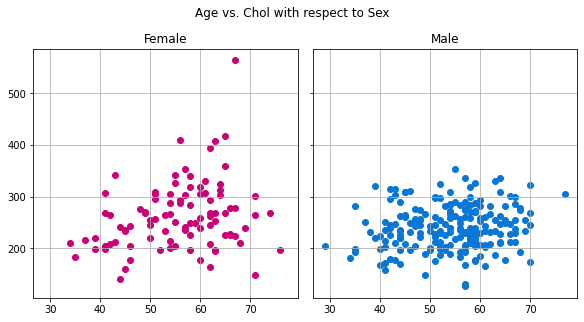

In [ ]:
drawScatter("Sex", "Age", "Chol")

> Cholesterol levels of males seem to show more clustering. There is less variation compared to females. 

> Higher cholesterol levels seen especially in older women can be caused by a physiologic boost in women, which is not all bad. Since there is "good" and "bad" cholesterol, these levels are not very telling. 

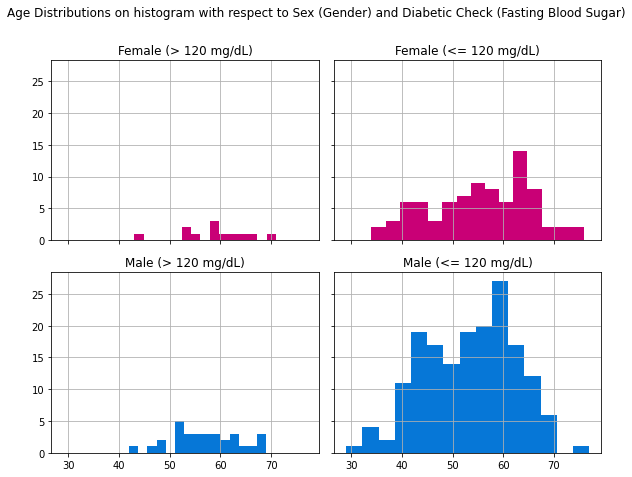

In [ ]:
drawHist("Sex", "Fbs", "Age")

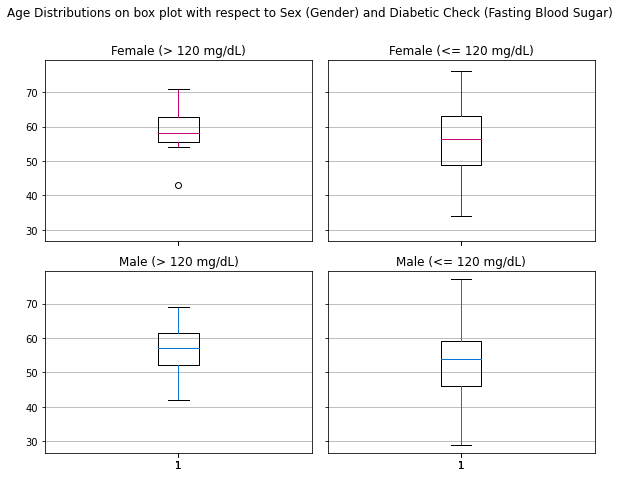

In [ ]:
drawBoxPlot("Sex", "Fbs", "Age")

> A fasting blood glucose level above 120 is a bad thing that may indicate diabetes, which is a risk factor for heart disease. It is less common in younger people. It makes sense since prevalence of Type II Diabetes increases with age. 

> There seems to be no difference between males and females. 

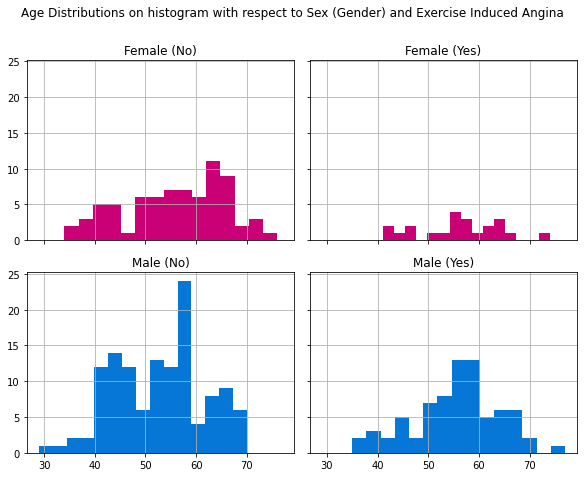

In [ ]:
drawHist("Sex", "ExAng", "Age")

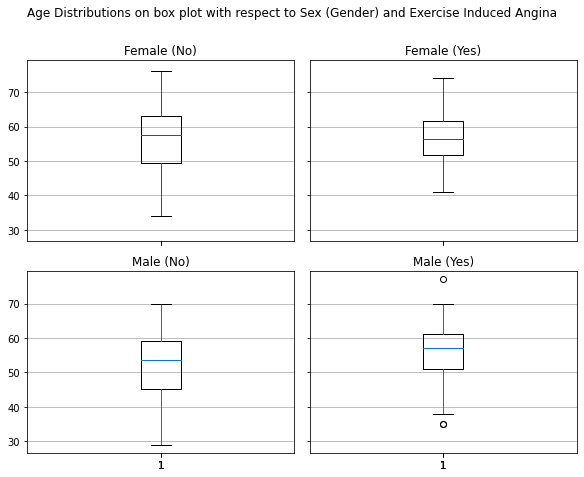

In [ ]:
drawBoxPlot("Sex", "ExAng", "Age")

> Exercise induced angina seems to be a lot more common among men compared to women. This could be due to men doing heavier work in comparison and taking worse care of themselves throughout the years.

> Exercise induced angina seems to peak in males around the age of 60. In females between ages 55-65 have a similar pattern but the ratio is a lot smaller compared to men. 

> Overall, it seems more like a problem of men. This can be a blessing in disguise though, as it can be an alarming symptom allowing the patient to take precautions before the occurence of life-threatening events such as heart attacks. 

##### Analysis and visualization of how each attribute changes with respect to age and sex 

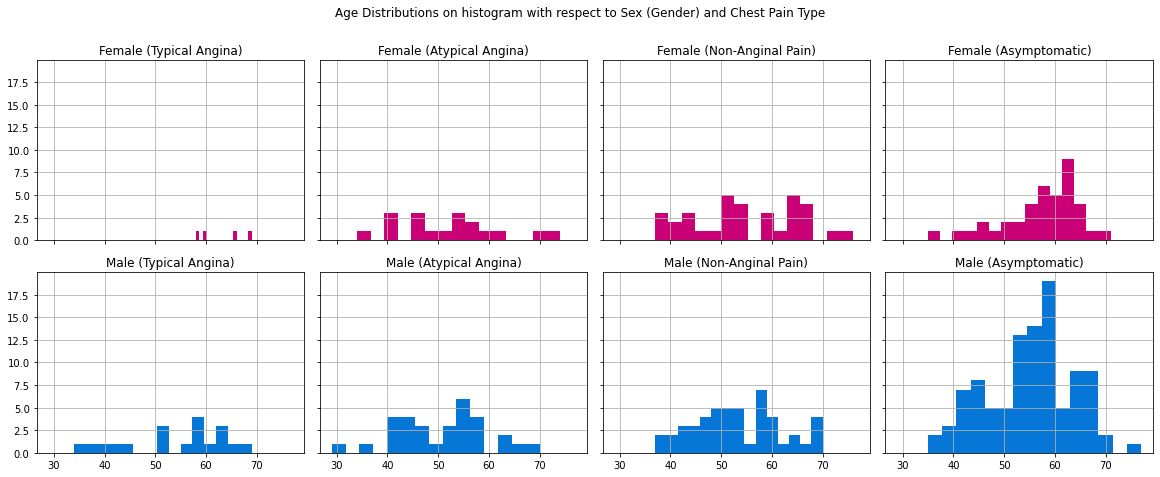

In [ ]:
drawHist("Sex", "ChestPain", "Age")

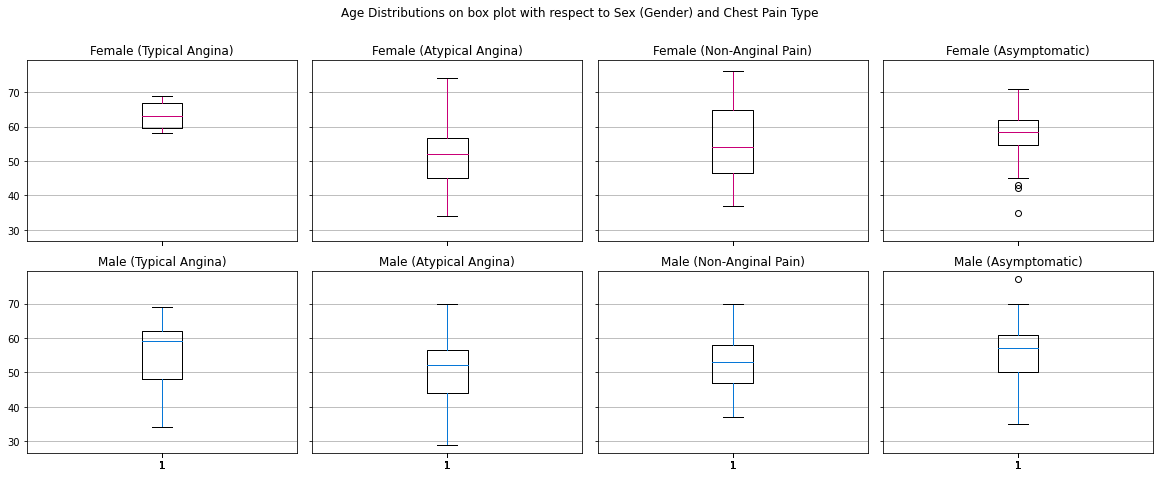

In [ ]:
drawBoxPlot("Sex", "ChestPain", "Age")

> For both genders the order of frequency of chest pain types is (from most common to least) asymptomatic, non-anginal pain, atypical angina and typical angina. 

> Asymptomatic chest pain peaks around the age of 60 in both genders. This might be due to the fact that as people get older, their nerves tend to get less sensitive and they might not feel the pain. 

> The biggest difference is in typical angina which is very uncommon for women and seen between ages 55-70. In males on the other hand, there are younger adults who experience typical angina. This could be because males are more prone to cardiovascular diseases and smoking and alcohol consumption are usually more common. 

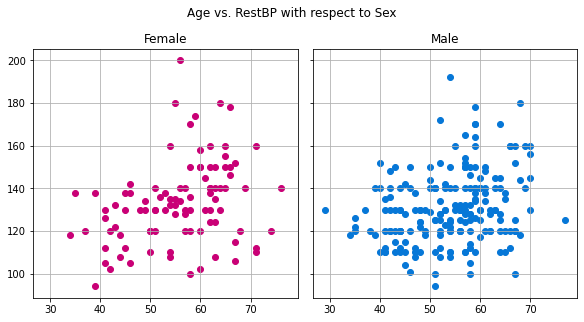

In [ ]:
drawScatter("Sex", "Age", "RestBP")

>Resting blood pressure is higher in the age interval 55-70 for both sexes. Hypertension is seen more commonly in elderly, probably this is the reason along with physiological deteriorations seen in both genders. 

>In males, especially between the ages 40 and 50, there are more people with blood pressure between 140-160 which is high. In females on the other hand, the threshold of 140 is almost not exceeded at all. 

>Differences between genders is especially prominent for middle aged(40-50) people, and as people get older they tend to have a higher blood pressure. 

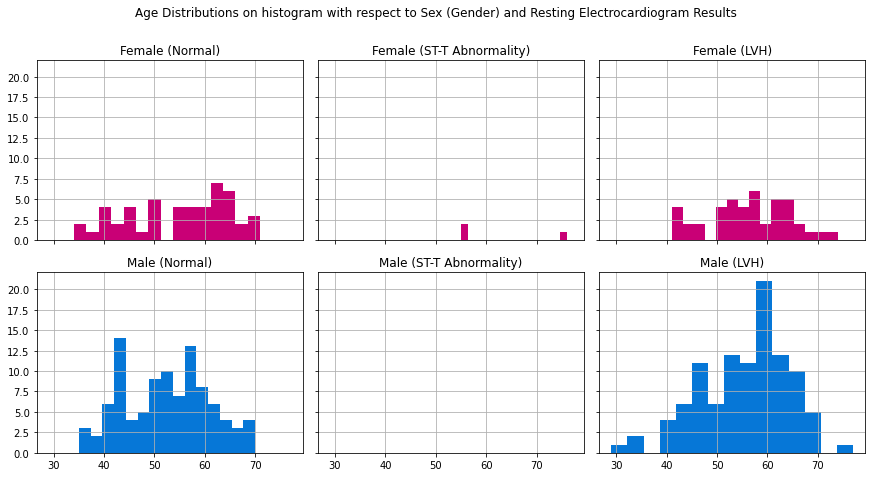

In [ ]:
drawHist("Sex", "RestECG", "Age")

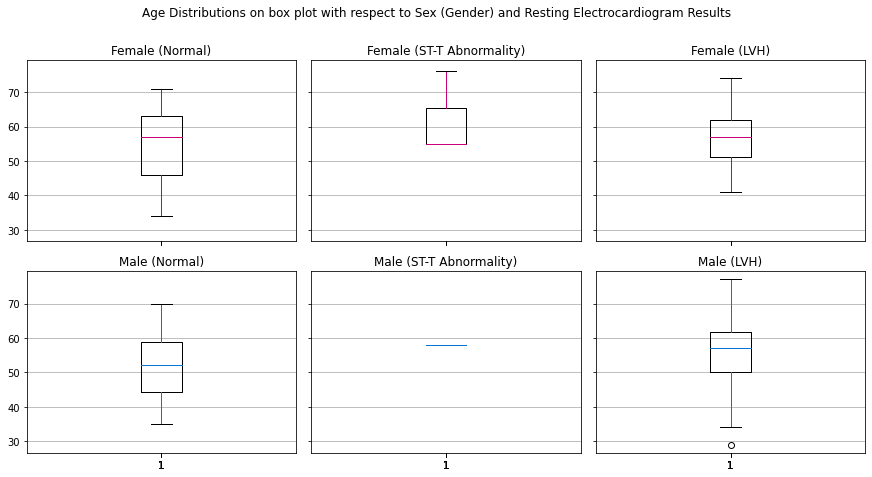

In [ ]:
drawBoxPlot("Sex", "RestECG", "Age")

> Distribution of patients with normal, ST-T wave abnormality and left ventricular hypertrophy is similar in both genders. Left ventricular hypertrophy peaks after 50 years of age. This is probably it is usually caused by the long term effects of hypertension, a chronic condition. 
> ST-T Abnormality might be something more acute/urgent and that's why it might be so low in both sexes. 

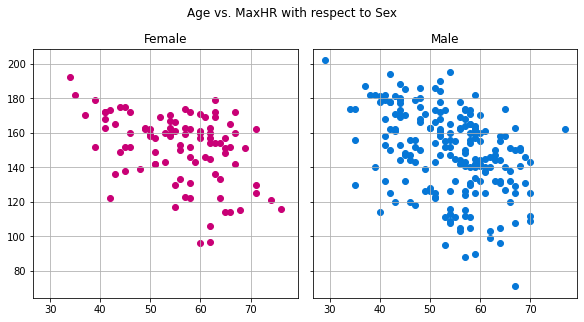

In [ ]:
drawScatter("Sex", "Age", "MaxHR")

>Females' heart rates seem to very rarely exceed 180 whereas it is not as uncommon for males. The distribution range of males seems wider from both ends. This could be due to differences between male and female physiology, or men  being more used to vigorous exercises/tasks. 

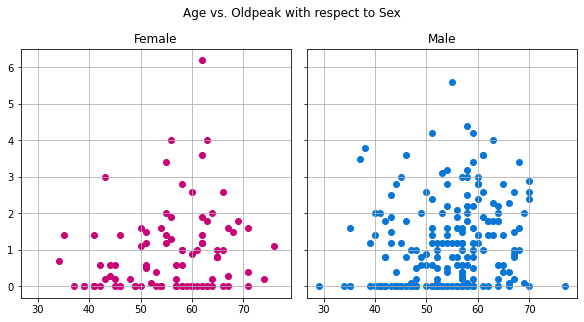

In [ ]:
drawScatter("Sex", "Age", "Oldpeak")

>ST depressions caused by exercise seem to be clustering around the age of 60 for both males and females. Also it seems to be more commong among men. This could be because women on average don't reach heart rates as high as men (as seen in the above plot)

>For both genders, a good portion of the patients do not have any ST depression with exercise as can be seen from the dots on 0 mm line. 

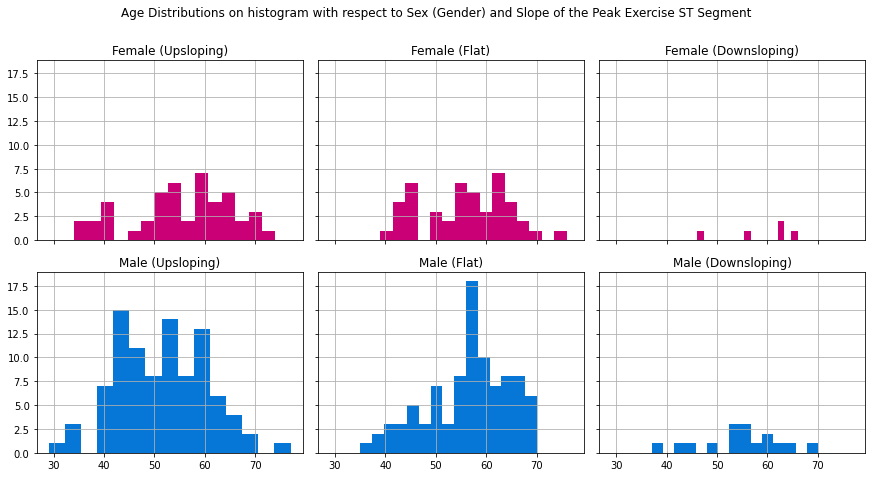

In [ ]:
drawHist("Sex", "Slope", "Age")

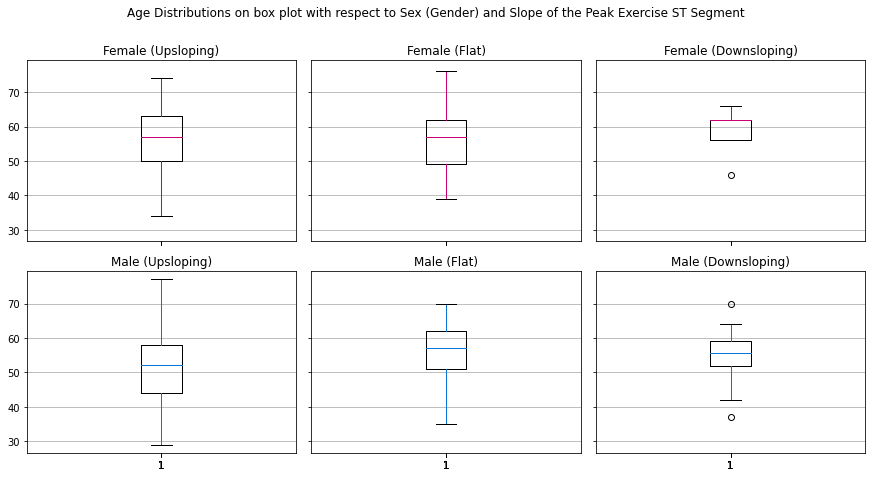

In [ ]:
drawBoxPlot("Sex", "Slope", "Age")

> For both genders, number of patients with upsloping and flat peak exercise ST segment seem to be close to each other. A downsloping peak exercise ST segment is less common in both but it’s still more common in men, suggesting a bad/unhealthy outcome. In almost every data plotted it could be seen that men have a higher risk of cardiovascular disease and worst outcomes are usually seen the least in both genders. There is no reason to think otherwise here. 

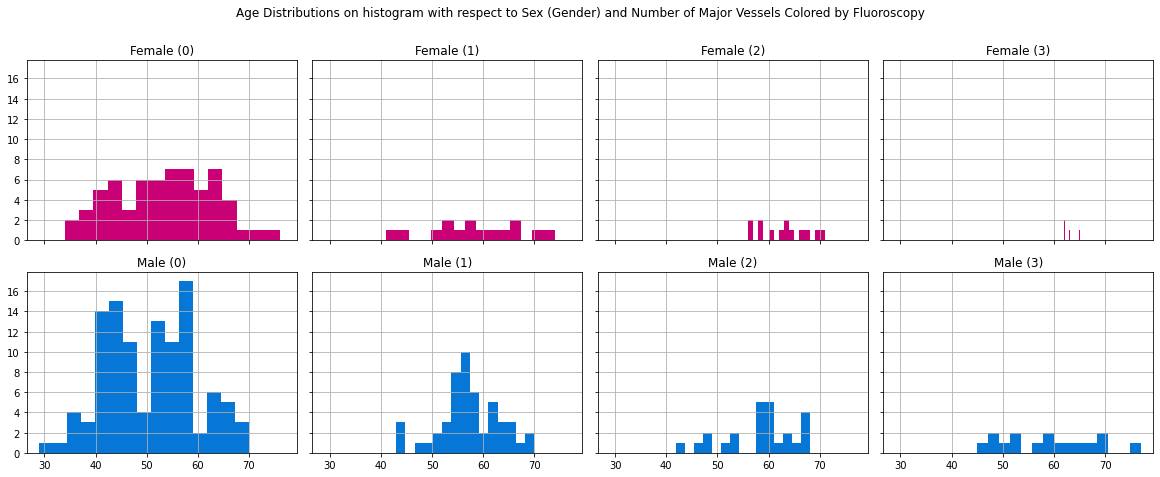

In [ ]:
drawHist("Sex", "Ca", "Age")

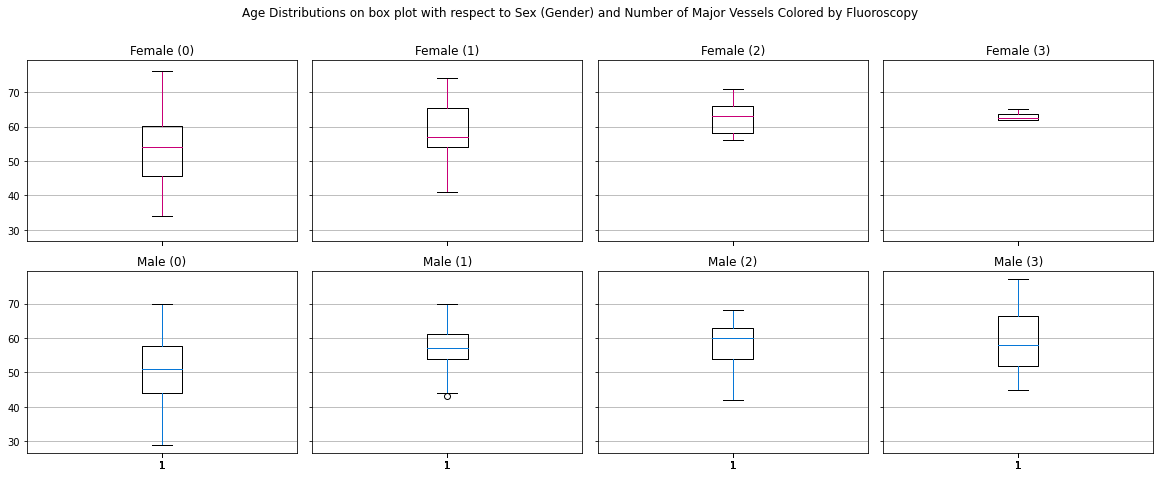

In [ ]:
drawBoxPlot("Sex", "Ca", "Age")

> For both genders, number of patients decrease as number of major vessels colored by fluoroscopy increases. Especially 1 and 3 vessels seem remarkably more common in men. 

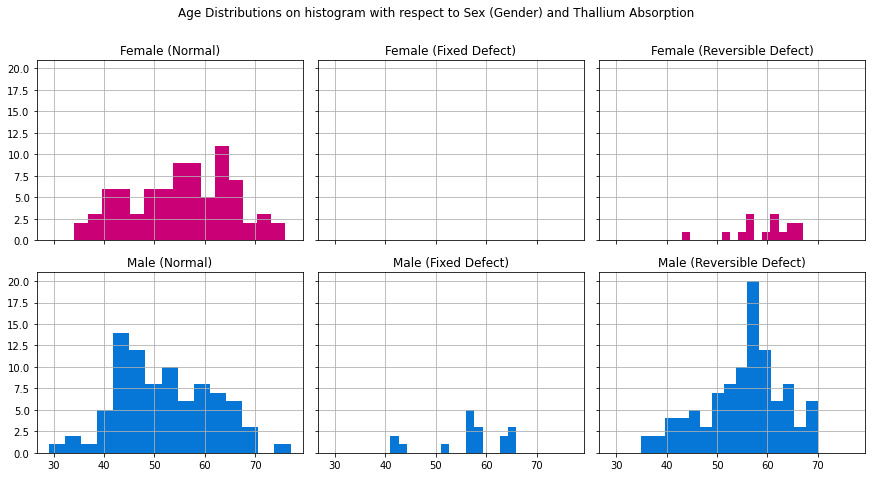

In [ ]:
drawHist("Sex", "Thal", "Age")

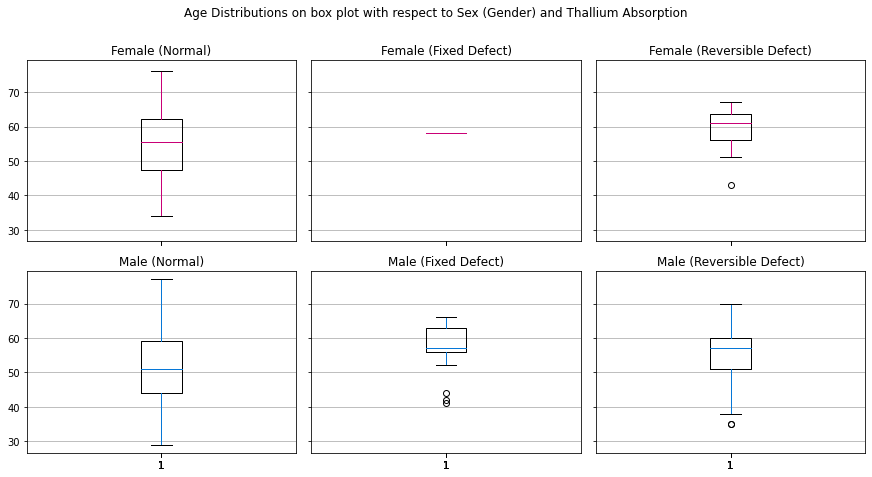

In [ ]:
drawBoxPlot("Sex", "Thal", "Age")

> In earlier ages, both sexes are mostly normal in terms of response to thalium. However, especially after 50, number of males with reversible defect peaks. In females this number is very low at all ages. 
> Fixed defect, which is irreversible, is not seen in the females in our dataset at all. It's a more serious stage for the patient and luckily although there are men with fixed defect, they are the minority. It makes sense because having a minor/less serious heart disease is more likely and more people (especially men) will have it compared to a later stage of the condition. 

##### Analysis and visualization of the relationship between each attribute (without AHD) and chest pain


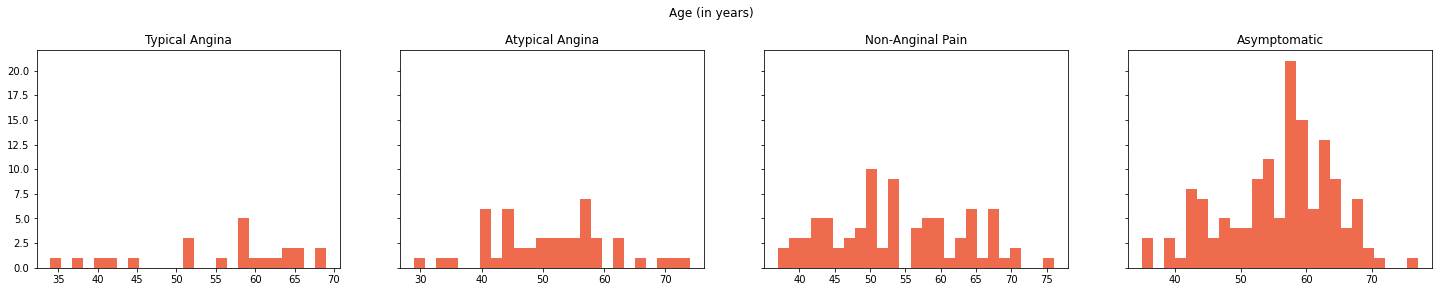

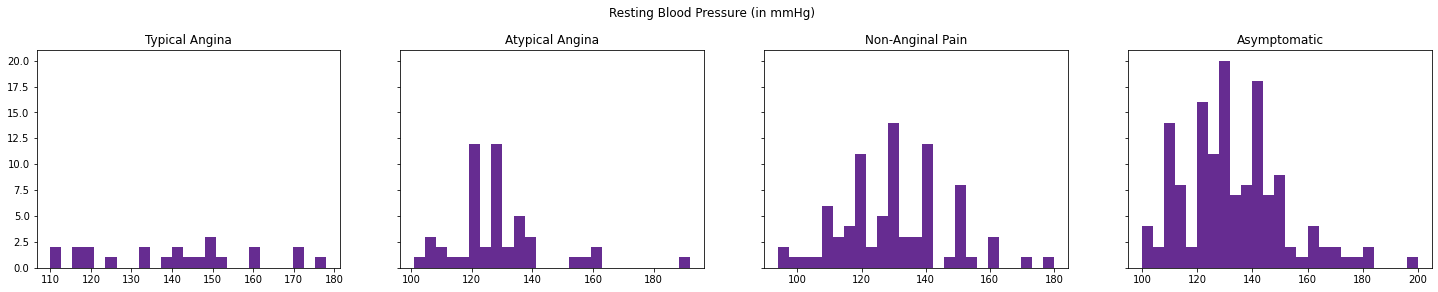

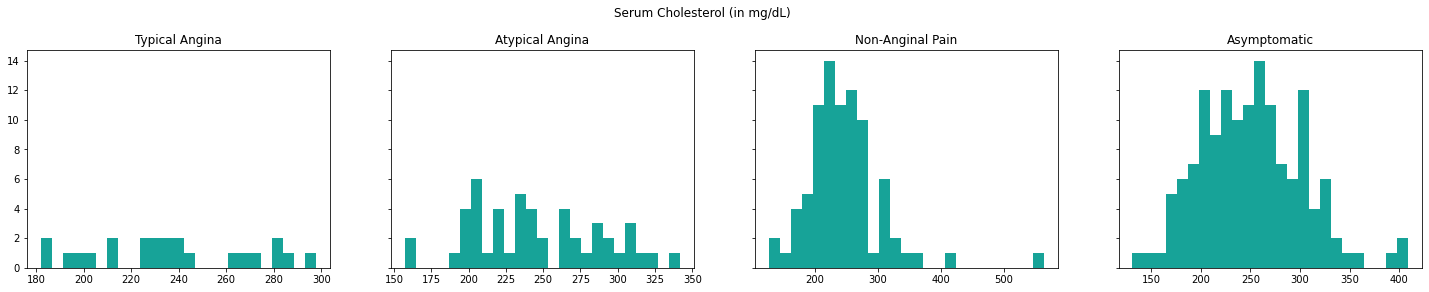

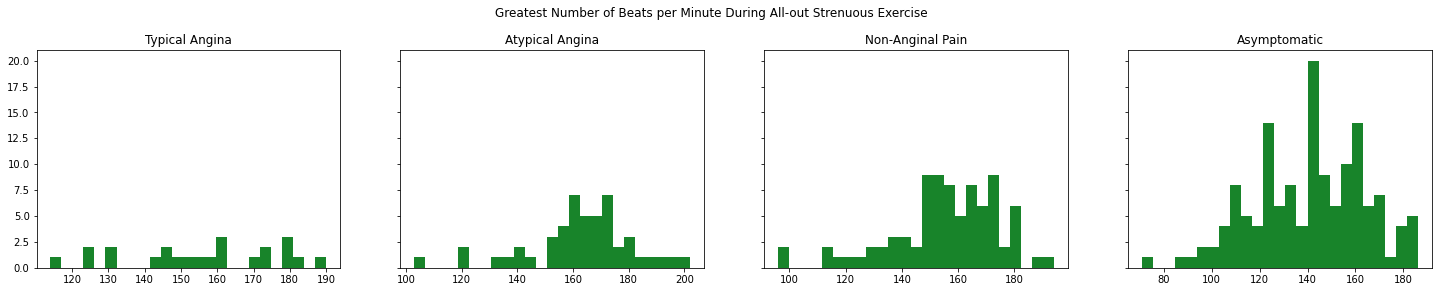

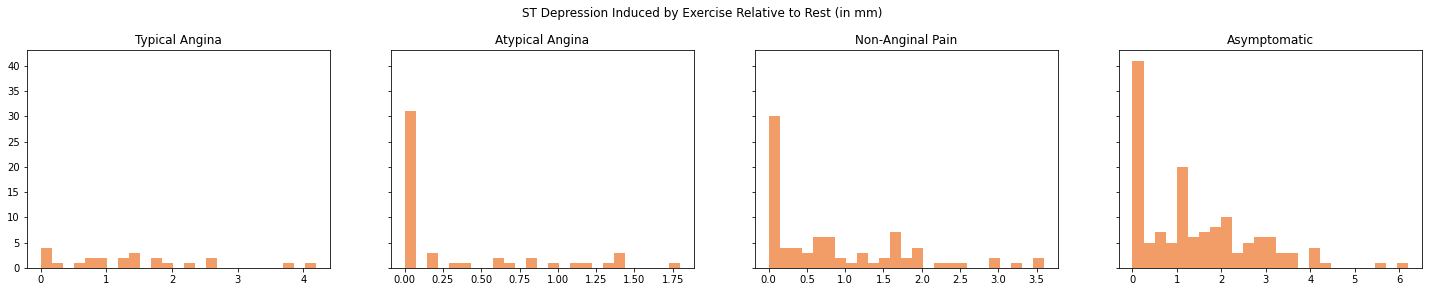

In [ ]:
# Plots the graphs of all quantitative attributes with respect to chest pain type
for idx in range(len(quantitativeAttributes)):
  attribute = quantitativeAttributes[idx]
  color = quantitativeAttr[attribute][0]
  description = quantitativeAttr[attribute][1]

  fig, axs = plt.subplots(1, 4, figsize=(25, 4), sharey=True)
  axs[0].hist(df[df["ChestPain"] == "typical"][attribute], bins=25, color=color)
  axs[0].set_title("Typical Angina")
  axs[1].hist(df[df["ChestPain"] == "nontypical"][attribute], bins=25, color=color)
  axs[1].set_title("Atypical Angina")
  axs[2].hist(df[df["ChestPain"] == "nonanginal"][attribute], bins=25, color=color)
  axs[2].set_title("Non-Anginal Pain")
  axs[3].hist(df[df["ChestPain"] == "asymptomatic"][attribute], bins=25, color=color)
  axs[3].set_title("Asymptomatic")

  fig.suptitle(description, x=0.5, y=1.03)

>In the figure above, relationships between continuous variables and chest pain have been depicted. In general, it can be seen that typical angina is the chest pain type that is seen least in terms of count and there seems no significant relationship between typical angina and other attributes.

>As it can be observed from previous figures, asymptomatic chest pain has the highest count, thus possible relationships between it and other attributes are more visible. It can be seen that asymptomatic chest pain is more common roughly between ages of 50 and 70 with median approximately at 60. Due to low numbers it’s harder to talk about atypical and non-anginal pain, but it seems like they are more skewed to the 50-60 interval. In the end, age interval 50 to 60 can be called as common for all. 

>On the resting blood pressure graph, asymptomatic chest pain seems to co-exist with blood pressure around 110-150 mmHg. Non-anginal pains seems to have a similar trend. However, range is narrower for atypical pain, which is 120-140 mmHg. It seems that this narrower interval is common for chest pains.
Relationships between serum cholesterol and asymptomatic and non-anginal chest pains are one of the most visible ones. Interval of 200-300 mg/dL seems to have relationship with these two types. Despite low numbers, atypical angina also seem to be related such interval. 

>In terms of maximum beats per minute during exercise, asymptomatic type seem to be related with a wider interval, namely from 120 to 170 bpm whereas atypical and non-anginals pains have a narrower and shifted interval of 140-180 bpm more commonly. 

>Lastly, ST Depression is generally most common with value 0 and it can observed again in graphs above. However, asymptomatic chest pain seem to be more related with ST Depression value being larger than 0 when compared to others. 


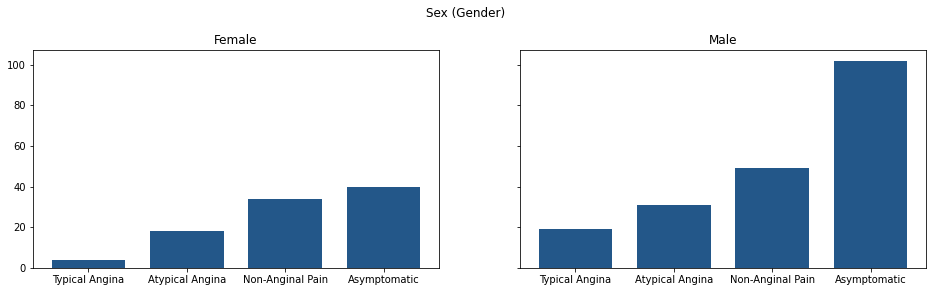

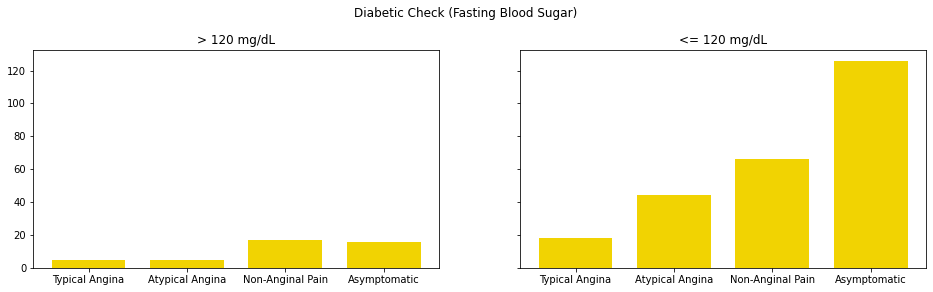

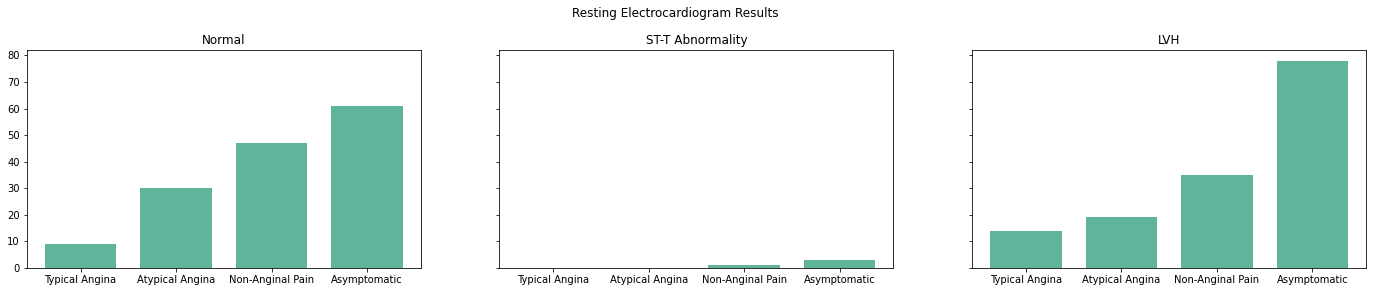

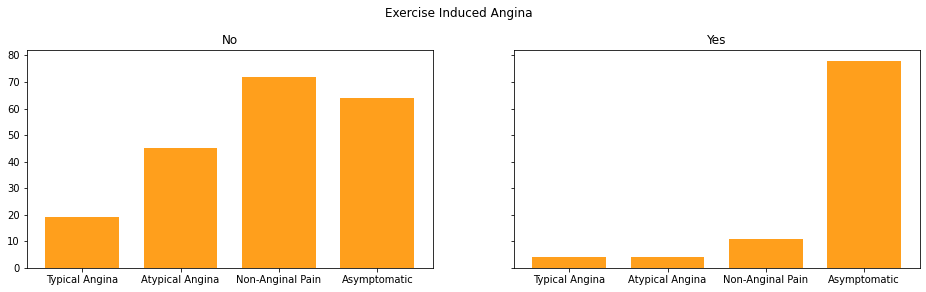

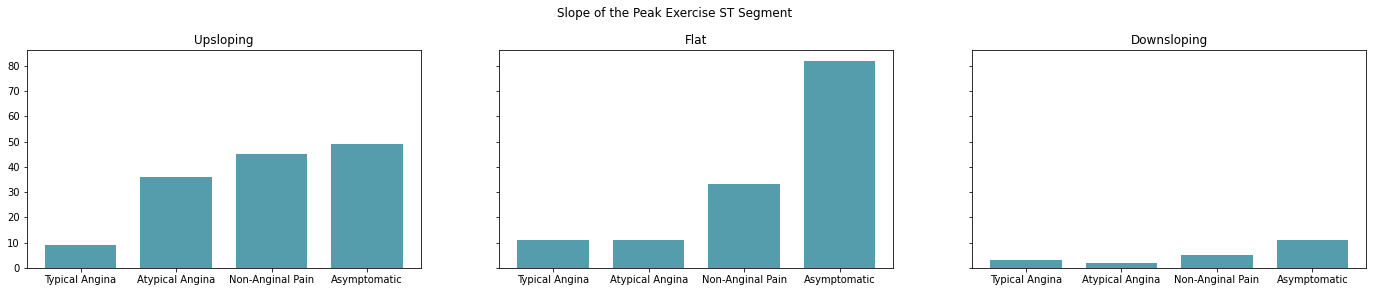

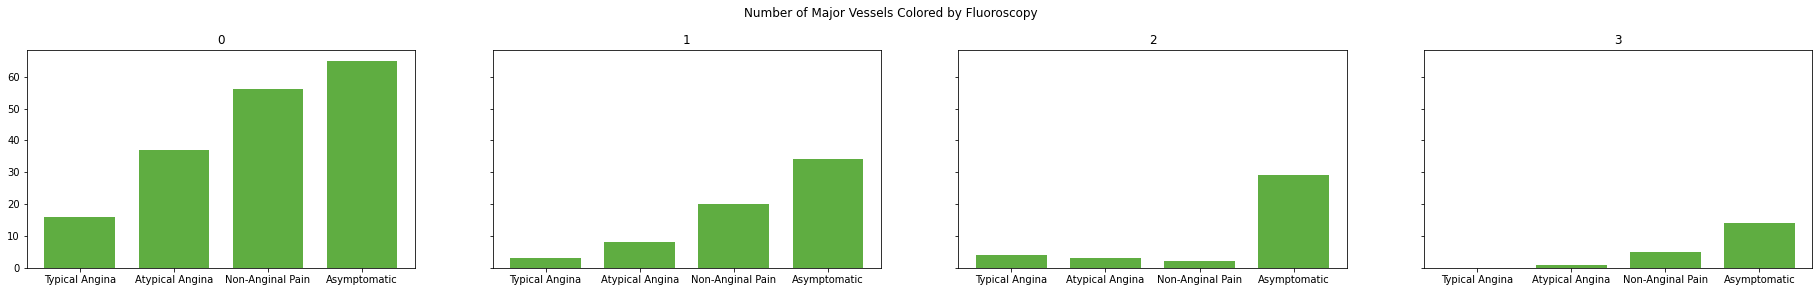

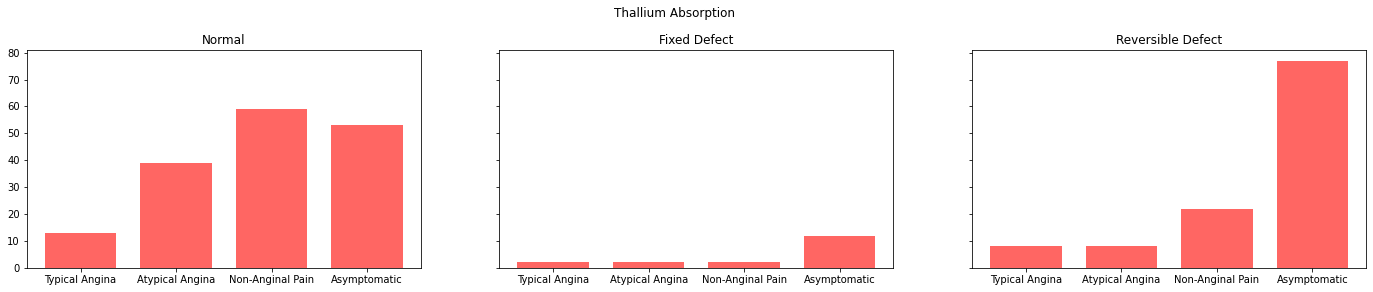

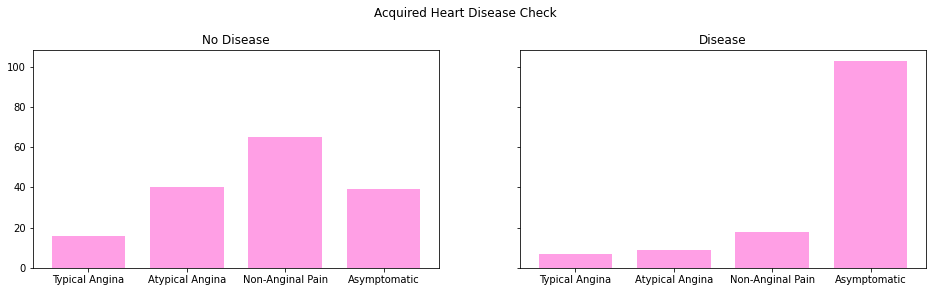

In [ ]:
# Plots the graphs of all categorical attributes with respect to chest pain type
for idx in range(len(categoricalAttributes)):
  attribute = categoricalAttributes[idx]
  if(attribute == "ChestPain"):
    continue
  color = categoricalAttr[attribute][0]
  description = categoricalAttr[attribute][1]
  values = categoricalAttr[attribute][2]
  valueDetails = categoricalAttr[attribute][3]

  fig, axs = plt.subplots(1, len(values), figsize=((len(values)*8), 4), sharey=True)
  x = categoricalAttr["ChestPain"][3]

  for vIdx in range(len(values)):
    value = values[vIdx]
    y = [list(df[df[attribute] == value]["ChestPain"]).count("typical"), list(df[df[attribute] == value]["ChestPain"]).count("nontypical"),
         list(df[df[attribute] == value]["ChestPain"]).count("nonanginal"), list(df[df[attribute] == value]["ChestPain"]).count("asymptomatic")]
    axs[vIdx].bar(x, y, width=0.75, color=color)
    axs[vIdx].set_title(valueDetails[vIdx])
  
  fig.suptitle(description, x=0.5, y=1.03)

>In the figures above, relationships between categorical variables and chest pain have been depicted. Generally, order of counts of each chest pain type with other attributes is same with total counts of chest pain types. However, there are some that can be considered as interesting.

>One of them is the No Exercise Induced Angina vs. Chest Pains. When compared to others, it was again expected that asymptomatic would have higher counts but it turns out that non-anginal has more. However, difference can be considered as small and be due to sample. Similar case is observed with patients without heart disease.

>Other cases are in terms of ratio of asymptomatic chest pain with other types. This case is especially visible with male as sex, smaller fasting blood sugar smaller than or equal to 120 mg/dL, left ventricular hypertrophy, exercise induced angina being observed, flat slope of ST segment, 2 as the number of colored major vessels, reversible defect of thallium absorbtion and aquired heart disease. Among them, sex, blood sugar, left ventricular hypertrophy could be explained by the total counts of these attributes, as they are rather common or roughly equally seen in sample. However, for others, it seems to indicate relationships with these attributes and asymptomatic chest pain.


##### Analysis and visualization of the relationship between two selected attributes, as well as whether they would lead to disease or not

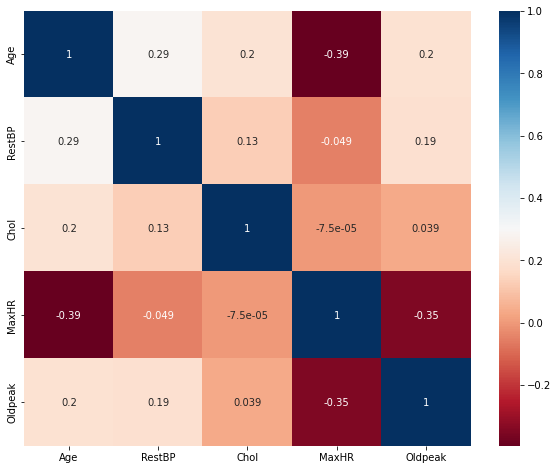

In [ ]:
# Draws the correlation matrix of quantitive attributes on a heatmap
import seaborn as sb
from matplotlib import cm

# Only quantitive attributes can be visualized with a correlation matrix
corr_df = df[["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]] # Selects quantitive attributes

plt.figure(figsize=(10, 8))
corr = corr_df.corr()
heat = sb.heatmap(corr, cmap=cm.RdBu, annot=True)

Correlation Matrix of People with Acquired Heart Disease:


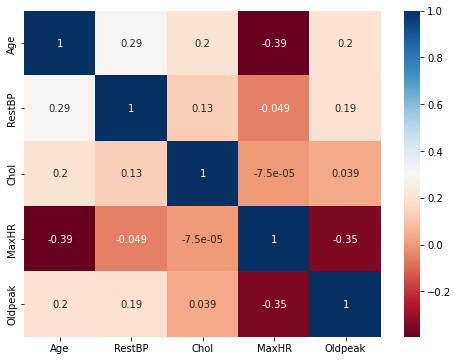


Correlation Matrix of People without Acquired Heart Disease:


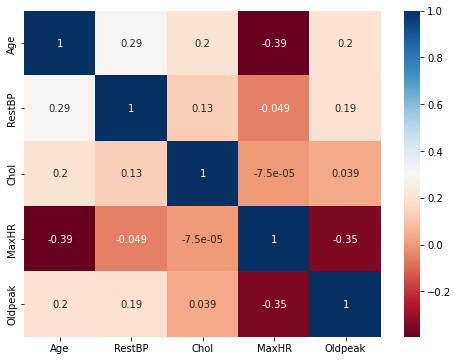

In [ ]:
# Draws the correlation matrix of people with disease on a heatmap
print("Correlation Matrix of People with Acquired Heart Disease:")
plt.figure(figsize=(8, 6))
corr_disease = df[df["AHD"] == "Yes"].corr()
heat = sb.heatmap(corr, cmap=cm.RdBu, annot=True)
plt.show()

# Draws the correlation matrix of people without disease on a heatmap
print("\nCorrelation Matrix of People without Acquired Heart Disease:")
plt.figure(figsize=(8, 6))
corr_nodisease = df[df["AHD"] == "No"].corr()
heat = sb.heatmap(corr, cmap=cm.RdBu, annot=True)
plt.show()

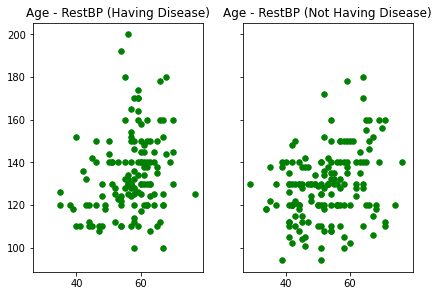

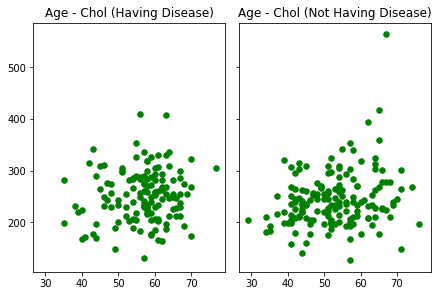

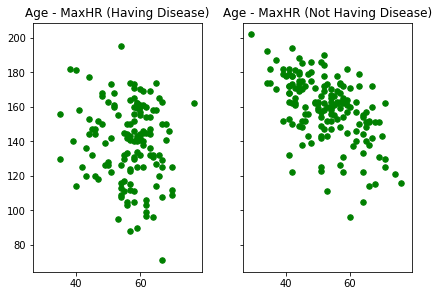

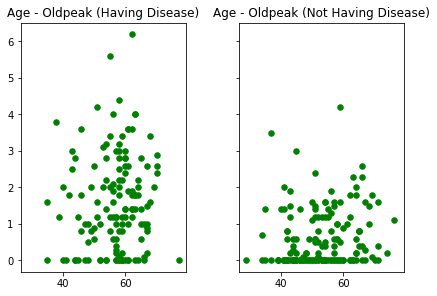

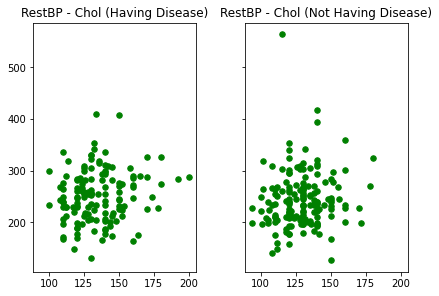

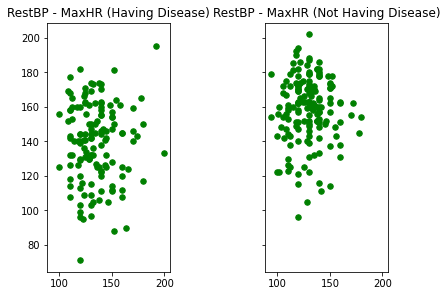

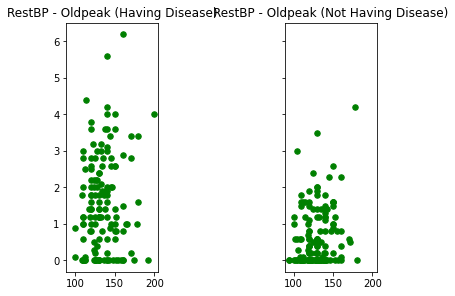

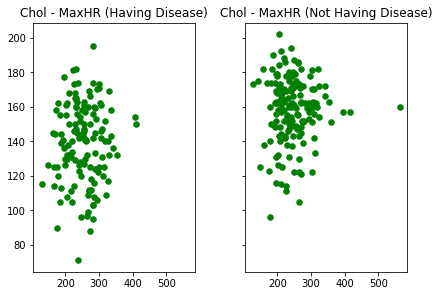

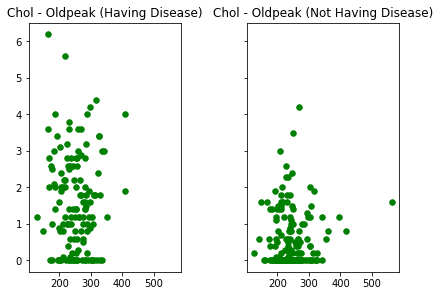

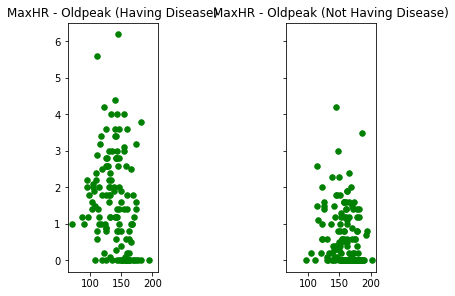

In [ ]:
#determining all possible combinations with 2 attributes
analyse = ['Age','RestBP','Chol','MaxHR','Oldpeak']

combination_list = []

for i in range(5):
  for j in range(i+1, 5):
    temp = [analyse[i], analyse[j]]
    combination_list.append(temp)
    
dy = df[df["AHD"] == "Yes"]
dn = df[df["AHD"] == "No"]

#drawing scatter plots for all possible combinations with 2 attributes for people having disease and not having diseases
for i in range(len(combination_list)):
  cl = combination_list[i]
  fig, axs = plt.subplots(1,2, sharey = True, sharex = True, constrained_layout=True)
  axs[0].scatter(dy[cl[0]], dy[cl[1]] , s=30, color="green")  # s-> marker size
  title = cl[0] + " - " + cl[1] + " (Having Disease)"
  axs[0].set_title(title)

  axs[1].scatter(dn[cl[0]], dn[cl[1]], s=30, color="green")  # s-> marker size
  title = cl[0] + " - " + cl[1] + " (Not Having Disease)"
  axs[1].set_title(title)

>In the figures above, relationships between attribute groups and if they lead to disease or not are depicted. 

>Correlation coefficients given on heatmaps don’t show any possible strong correlation to us in general. 

>From scatterplots, even though there is no strong correlation can be seen, clusters seem to be positioned similarly both in no disease and disease graphs in general but there are some shifts also, depending on existance of disease. However, these shifts seem to be on one of the axis, meaning that they happened due to one of the variables. As some variables have different distributions in case of disease, it can be said that this can be considered as not surprising.


##### Expansion of the main dataset with an additional dataset


In this part, the size of the dataset is significantly increased with the combination of another dataset with the main dataframe.

In [ ]:
with open("./drive/My Drive/CS210/heart.csv", "r") as f:
  df_extra = pd.read_csv(f)

In [ ]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Changes the names of the columns
df_extra.columns = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'AHD']
# Changes the values of the items according to the main dataframe format
df_extra['Sex'].replace({'M': 1, 'F': 0}, inplace=True)
df_extra['ChestPain'].replace({'TA': 'typical', 'ATA': 'nontypical', 'NAP': 'nonanginal', 'ASY': 'asymptomatic'}, inplace=True)
df_extra['RestECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
df_extra['ExAng'].replace({'N': 0, 'Y': 1}, inplace=True)
df_extra['Slope'].replace({'Up': 1, 'Flat': 2, 'Down' : 3}, inplace=True)

In [ ]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        918 non-null    int64  
 1   Sex        918 non-null    int64  
 2   ChestPain  918 non-null    object 
 3   RestBP     918 non-null    int64  
 4   Chol       918 non-null    int64  
 5   Fbs        918 non-null    int64  
 6   RestECG    918 non-null    int64  
 7   MaxHR      918 non-null    int64  
 8   ExAng      918 non-null    int64  
 9   Oldpeak    918 non-null    float64
 10  Slope      918 non-null    int64  
 11  AHD        918 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 86.2+ KB


In [ ]:
df_extra.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
0,40,1,nontypical,140,289,0,0,172,0,0.0,1,0
1,49,0,nonanginal,160,180,0,0,156,0,1.0,2,1
2,37,1,nontypical,130,283,0,1,98,0,0.0,1,0
3,48,0,asymptomatic,138,214,0,0,108,1,1.5,2,1
4,54,1,nonanginal,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Combines two dataframes by joining their elements
df = pd.concat([df, df_extra], ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         297 non-null    float64
 1   Age        1215 non-null   int64  
 2   Sex        1215 non-null   int64  
 3   ChestPain  1215 non-null   object 
 4   RestBP     1215 non-null   int64  
 5   Chol       1215 non-null   int64  
 6   Fbs        1215 non-null   int64  
 7   RestECG    1215 non-null   int64  
 8   MaxHR      1215 non-null   int64  
 9   ExAng      1215 non-null   int64  
 10  Oldpeak    1215 non-null   float64
 11  Slope      1215 non-null   int64  
 12  Ca         297 non-null    float64
 13  Thal       297 non-null    object 
 14  AHD        1215 non-null   object 
dtypes: float64(3), int64(9), object(3)
memory usage: 142.5+ KB


In [ ]:
# Drops the rows which doesn't exist in the second dataframe
df = df.drop(columns=["ID", "Ca", "Thal"])
del categoricalAttr["Ca"]
del categoricalAttr["Thal"]
categoricalAttributes.remove("Ca")
categoricalAttributes.remove("Thal")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1215 non-null   int64  
 1   Sex        1215 non-null   int64  
 2   ChestPain  1215 non-null   object 
 3   RestBP     1215 non-null   int64  
 4   Chol       1215 non-null   int64  
 5   Fbs        1215 non-null   int64  
 6   RestECG    1215 non-null   int64  
 7   MaxHR      1215 non-null   int64  
 8   ExAng      1215 non-null   int64  
 9   Oldpeak    1215 non-null   float64
 10  Slope      1215 non-null   int64  
 11  AHD        1215 non-null   object 
dtypes: float64(1), int64(9), object(2)
memory usage: 114.0+ KB


In [ ]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,No


## **Part 2: Statistical Analysis & Hypothesis Testing**
In this part, data is interpreted statistically with statistical methods such as hypothesis testing.

In [ ]:
from scipy import stats
from scipy import special
import math

# Calculates the mean of the data
def findMean(data):
  size = len(data)
  return (sum(data)/size)

# Calculates the variance of the data
def findVariance(x):
  data = df[x]
  n = len(data)
  m = findMean(x)
  stds = [(x-m) ** 2 for x in data]
  return sum(stds) / n

# Calculates the standard deviation of the data
def findStd(x):
  return math.sqrt(findVariance(x))

# Calculates the p-value of the given parameter by using t-test
def findTTestP(parameter):
  resultWithHD = df[df["AHD"] == "Yes"][parameter]
  resultWithoutHD = df[df["AHD"] == "No"][parameter]
  testResults = stats.ttest_ind(resultWithHD, resultWithoutHD)
  print(f"Statistic value for {parameter}: {testResults[0]}, p-value: {testResults[1]}")

# Calculates the p-value of the given parameter by using chi-square test
def findChiSquareP(parameter):
  contigency = pd.crosstab(df["AHD"], df[parameter])
  testResults = stats.chi2_contingency(contigency)
  print(f"Statistic value for {parameter}: {testResults[0]}, p-value: {testResults[1]}")

def nullHyptohesisRejection(alpha):
  if (alpha < 0.01):
    print("We found a strong evidence to reject the null hypothesis.")
  else:
    print("We couldn't find a strong evidence to reject the null hypothesis.")

##### Statistical tests to check whether the values of chest pain, RestBP and Chol contribute to heart disease or not



  - **Null Hypothesis ($\large{H_0}$)**: Chest pain type has not an important impact on heart disease.

  - **Alternative Hypothesis ($\large{H_A}$)**: Chest pain type has an important impact on heart disease.

In [ ]:
findChiSquareP("ChestPain") # Finds a p-value for the chest pain type with chi-square test

Statistic value for ChestPain: 358.16006283580543, p-value: 1.1352059244757602e-71


>Since the p-value is 1.14E-71, which is very very low so that almost zero, we found a very strong evidence to reject the null hypothesis. Thus, chest pain type has an important impact on heart disease.


  - **Null Hypothesis ($\large{H_0}$)**: Average resting blood pressure level of people with HD - Average cholesterol level of people without HD = 0

  - **Alternative Hypothesis ($\large{H_A}$)**: Average resting blood pressure level of people with HD - Average cholesterol level of people without HD ≠ 0

In [ ]:
findTTestP("RestBP") # Finds a p-value for the resting blood pressure with t-test

Statistic value for RestBP: 2.6678917570482685, p-value: 0.008054796358875278


>Since the p-value is 0.008, which is very low, we found a strong evidence to reject the null hypothesis. Thus, resting blood pressure level has an important impact on heart disease.

  - **Null Hypothesis ($\large{H_0}$)**: Average cholesterol level  of people with HD - Average cholesterol level of people without HD = 0

  - **Alternative Hypothesis ($\large{H_A}$)**: Average cholesterol level  of people with HD - Average cholesterol level of people without HD ≠ 0


In [ ]:
findTTestP("Chol") # Finds a p-value for the cholesterol level with t-test

Statistic value for Chol: 1.3834015443480652, p-value: 0.16758776714742368


>Since the p-value is 0.17, which is quite high, at 1%, 5%, an 10% significance levels, we couldn't find a strong evidence to reject the null hypothesis; however, we found a weak evidence to reject the null hypothesis  at significance level of higher than 17%. Thus, cholesterol level might have an impact on heart disease.


##### Statistical tests to check whether age and sex contribute to heart disease or not


  - **Null Hypothesis ($\large{H_0}$)**: Ages of people with HD - Ages of people without HD = 0

  - **Alternative Hypothesis ($\large{H_A}$)**: Ages of people with HD - Ages of people without HD ≠ 0

In [ ]:
findTTestP("Age") # Finds a p-value for the age with t-test

Statistic value for Age: 4.004759233496147, p-value: 7.862867945608019e-05


>Since the p-value is 7.86E-5, which is quite low so that almost zero, we found a strong evidence to reject the null hypothesis. Thus, age has an important effect on heart disease.


  - **Null Hypothesis ($\large{H_0}$)**: Sex (gender) has no effect on heart disease.

  - **Alternative Hypothesis ($\large{H_A}$)**: Sex (gender) has an impact on heart disease.

In [ ]:
findChiSquareP("Sex") # Finds a p-value for the sex (gender) with chi-square test

Statistic value for Sex: 122.03924619660603, p-value: 2.8068559523242486e-26


>Since the p-value is 2.81E-26, which is very low almost zero, we found a strong evidence to reject the null hypothesis. Thus, sex (gender) has an important effect on heart disease.

##### Statistical tests to check if significant differences exist between age groups and sex that suffer from heart disease

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Calculates the age distinction which has the minimum p-value
def findMinPValuedAge(sex):
  minPValuedAge = 15
  minPValue = 1000
  for age in range(15, 90):
    group1 = df[(df["Age"] >= int(age)) & (df["Sex"] == sex)]["AHD"].replace({"No": 0, "Yes": 1})
    group2 = df[(df["Age"] < int(age)) & (df["Sex"] == sex)]["AHD"].replace({"No": 0, "Yes": 1})
    testResults = stats.ttest_ind(group1, group2)
    pValue = testResults[1]
    if (minPValue > pValue):
      minPValue = pValue
      minPValuedAge = age
  return minPValuedAge, minPValue

  - **Null Hypothesis ($\large{H_0}$)**: People from all ages have the same possibility of having acquired heart disease.

  - **Alternative Hypothesis ($\large{H_A}$)**: People above the age of X are more tend to have acquired heart disease than others.

In [ ]:
# Finds age with the minimum p-value for females
minFemaleAge, minFemalePVal = findMinPValuedAge(0) # 0 for female
print(f"There is a distinction between females in the age of {minFemaleAge} with a p-value of {minFemalePVal}")

There is a distinction between females in the age of 55 with a p-value of 7.525370329234282e-09


In [ ]:
# Finds age with the minimum p-value for males
minMaleAge, minMalePVal = findMinPValuedAge(1) # 1 for male
print(f"There is a distinction between males in the age of {minMaleAge} with a p-value of {minMalePVal}")

There is a distinction between males in the age of 55 with a p-value of 1.495377633332345e-16


> There is a maximized distinction between males and females in the age of 55; therefore, according to our data, after the age 55, people are more tend to have acquired heart disease than others.

##### Statistical tests to check how all those attributes contribute to heart disease


  - **Null Hypothesis ($\large{H_0}$)**: X attribute does not have an important impact on acquired heart disease.

  - **Alternative Hypothesis ($\large{H_A}$)**: X attribute has an important impact on acquired heart disease.

In [ ]:
# Performs t-tests for the quantitive attributes
for attr in quantitativeAttributes:
  findTTestP(attr)

# Performs chi-square tests for the categorical attributes
for attr in categoricalAttributes:
  findChiSquareP(attr)

Statistic value for Age: 4.004759233496147, p-value: 7.862867945608019e-05
Statistic value for RestBP: 2.6678917570482685, p-value: 0.008054796358875278
Statistic value for Chol: 1.3834015443480652, p-value: 0.16758776714742368
Statistic value for MaxHR: -8.036781366876342, p-value: 2.239715323393672e-14
Statistic value for Oldpeak: 8.042214149140525, p-value: 2.1597372771142576e-14
Statistic value for Sex: 122.03924619660603, p-value: 2.8068559523242486e-26
Statistic value for ChestPain: 358.16006283580543, p-value: 1.1352059244757602e-71
Statistic value for Fbs: 80.80279873808486, p-value: 2.0645566639576222e-17
Statistic value for RestECG: 144.3387741642798, p-value: 1.216027449389105e-28
Statistic value for ExAng: 282.72972936761727, p-value: 5.434669544687024e-61
Statistic value for Slope: 399.6094460300536, p-value: 3.391875928923501e-83
Statistic value for AHD: 3645.0000000000005, p-value: 0.0


> For Age, RestBP, MaxHR, OldPeak, Sex, ChestPain, Fbs, RestECG, ExAng, and Slope, we found a strong evidence to reject their null hypotheses stating that they do not have impact on acquired heart disease; therefore, they have effects on AHD. On the other hand, for Chol, we could not find a strong evidence to reject their null hypotheses saying they do not have an important impact on AHD, which might be correct since they have high p-values.

## **Part 3: Machine Learning**
In this part, a prediction system is developed with machine learning principles.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

##### Prediction of heart disease given values of age, sex, chest pain and RestBP with Logistic Regression and k-Nearest Neighbors (kNN) Algorithm


> In order to maximize our data's accuracy, we will not use the main dataset, but will use the expanded version of our dataset; thus, it will give a more correct result.

In [ ]:
# Filters the main dataframe so that only age, sex, chest pain type and resting blood pressure rows remain
df_filtered = df.drop(columns=["Chol", "Fbs", "RestECG", "MaxHR", "ExAng", "Oldpeak", "Slope", "AHD"])
df_filtered['ChestPain'].replace({'typical': 1, 'nontypical': 2, 'nonanginal': 3, 'asymptomatic': 4}, inplace = True)
x = df_filtered # Features
y = df["AHD"] # Label
y.replace({"No": 0, "Yes": 1}, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
data_columns = ["Age", "Sex (Gender)", "Chest Pain Type", "Resting Blood Pressure"]

In [ ]:
# Logistic Regression Model training with the main dataframe
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)
y_pred = log_reg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       114
           1       0.78      0.81      0.79       129

    accuracy                           0.77       243
   macro avg       0.77      0.77      0.77       243
weighted avg       0.77      0.77      0.77       243



> Logistic regression model with four parameters gives an accuracy score of 0.77, which is quite good, but maybe we can reach a better accuracy with other techniques.

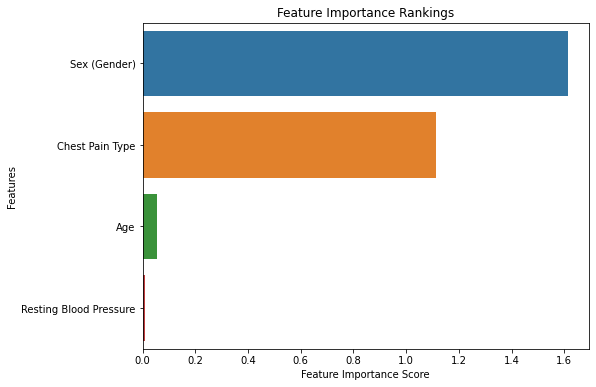

In [ ]:
# Graphs the feature importance rankings
feature_importances = pd.Series(log_reg_model.coef_[0], index = data_columns).sort_values(ascending = False)
plt.figure(figsize=(8, 6))
sns.barplot(x = feature_importances, y = feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

In [ ]:
def plotConfusionMatrix(cm, classes, title = "Confusion Matrix", cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  name = None
  fmt = 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if i == 0 and j == 0:
      name = "True Negatives"
    elif i == 0 and j == 1:
      name = "False Positives"
    elif i == 1 and j == 1:
      name = "True Positives"
    else:
      name = "False Negatives"
    plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment = "center", fontsize = 23, color = "white" if cm[i, j]-5 > thresh else "black")

  plt.ylabel('True label', labelpad = 12)
  plt.xlabel('Predicted label', labelpad = 12)
  plt.title(title, y = 1.02)
  plt.tight_layout()

def getConfusionMatrix(y_test, y_pred):
  cnf_matrix = confusion_matrix(y_test, y_pred)
  np.set_printoptions(precision = 2)
  plt.figure(figsize=(8, 8))
  plt.grid(False)
  plotConfusionMatrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

class_names = ["No Heart Disease", "Heart Disease"]

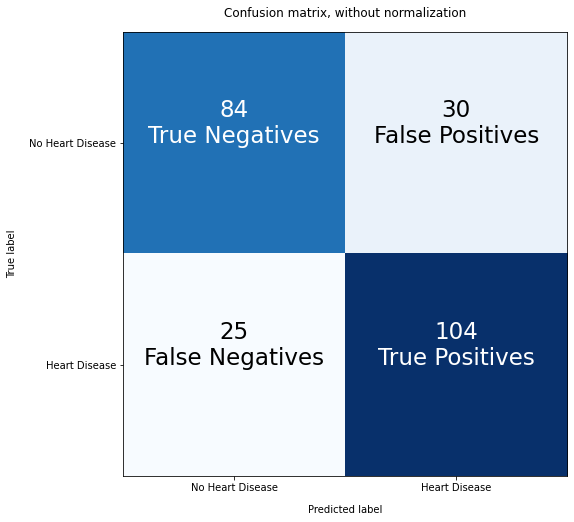

In [ ]:
# Confusion Matrix for Logistic Regression Model
getConfusionMatrix(y_test, y_pred)

In [ ]:
# K-Nearest Neighbors Model training with the main dataframe
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       114
           1       0.72      0.71      0.71       129

    accuracy                           0.70       243
   macro avg       0.69      0.69      0.69       243
weighted avg       0.70      0.70      0.70       243



>kNN model has a p-value of 0.7, with similar precision and f1-scores, it seems to perform worse at that point; however, we can increase its performance by hyper-parameter tuning.

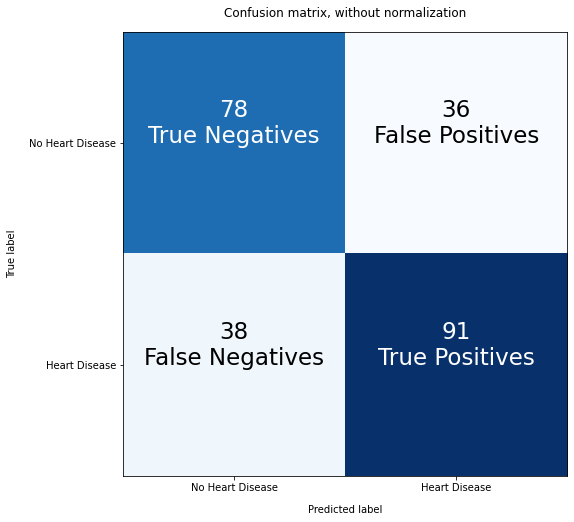

In [ ]:
# Confusion Matrix for kNN Model
getConfusionMatrix(y_test, y_pred)

> In kNN model, our accuracy and reliability decreased as can be seen by both classification report and confusion matrix which has more false positives and false negatives so that more errors than before.

##### Hyper-parameter tuning to increase model performance of the kNN algorithm


In [ ]:
# Calculates and plots the k-value parameter results according to a given distance metric
def getScoresOfMetric(distanceMetric):
  error = []
  accuracy = []

  for i in range(1, 50):
      knn_model = KNeighborsClassifier(metric = distanceMetric, n_neighbors = i)
      knn_model.fit(x_train, y_train)
      y_pred = knn_model.predict(x_test)
      error.append(np.mean(y_pred != y_test))
      accuracy.append(accuracy_score(y_test, y_pred))

  plt.figure(figsize = (12, 6))
  plt.plot(range(1, 50), accuracy, linestyle='dashed', marker='o', markersize=10)
  plt.title('Accuracy Score by k value')
  plt.xlabel('K value')
  plt.ylabel('Accuracy Score')

  plt.figure(figsize = (12, 6))
  plt.plot(range(1, 50), error, linestyle='dashed', marker='o', markersize=10)
  plt.title('Error Rate by k value')
  plt.xlabel('K value')
  plt.ylabel('Mean Error')

> kNN algorithm gives different results for different hyper-parameters. For four different distance metrics, we tried 50 different k-values and calculated their accuracy scores and error rates which are also plotted on graphs. Thus, we became able to choose an optimal metric with an optimal k-value for our algorithm.

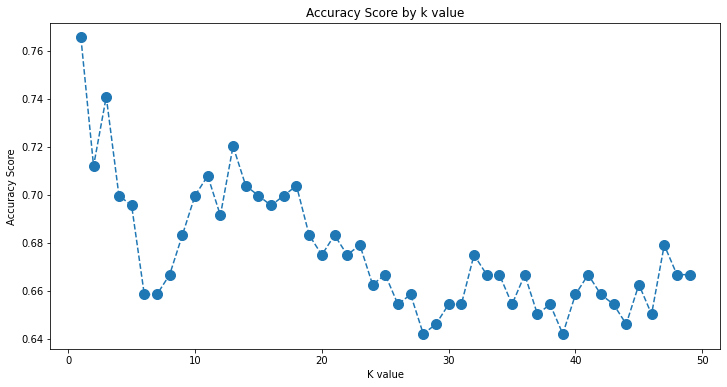

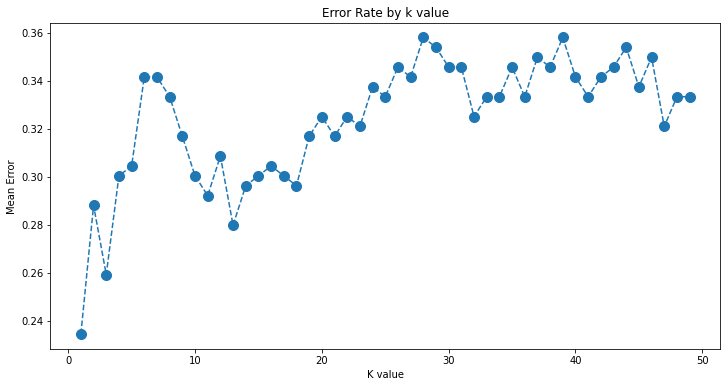

In [ ]:
# K-Neighbors Parameter with Euclidean Distance Metric: Hyper-parameter tuning with four parameter algorithm
getScoresOfMetric("euclidean")

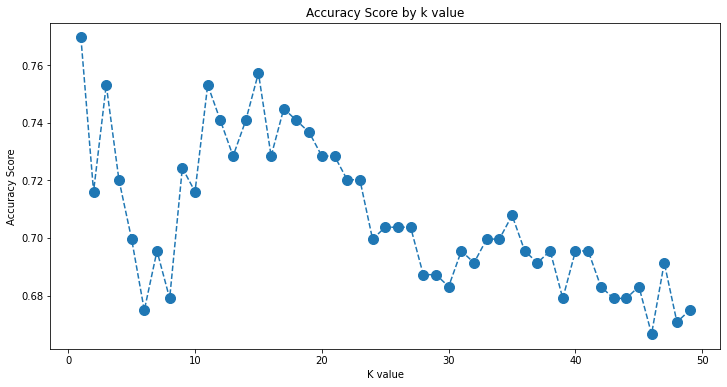

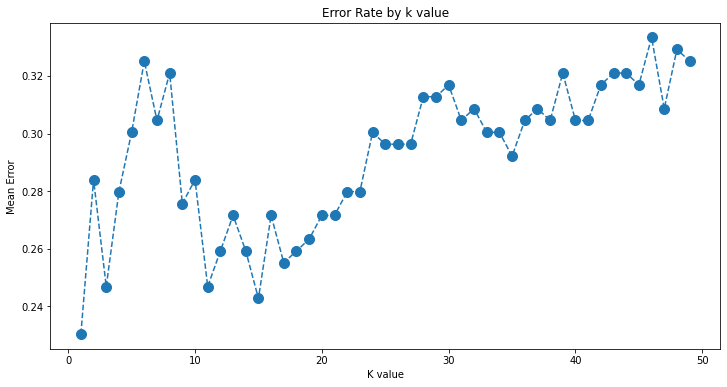

In [ ]:
# K-Neighbors Parameter with Manhattan Distance Metric: Hyper-parameter tuning with four parameter algorithm
getScoresOfMetric("manhattan")

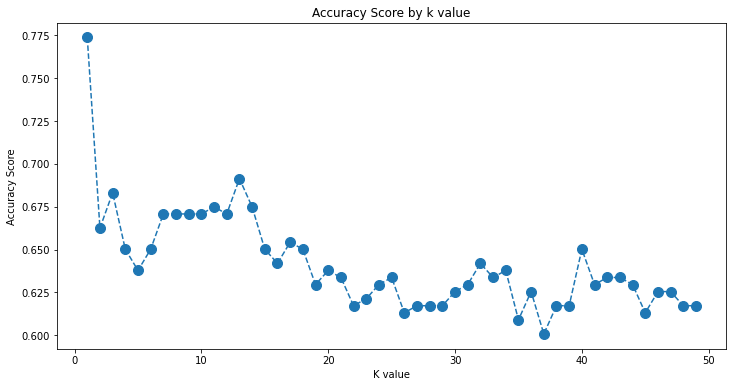

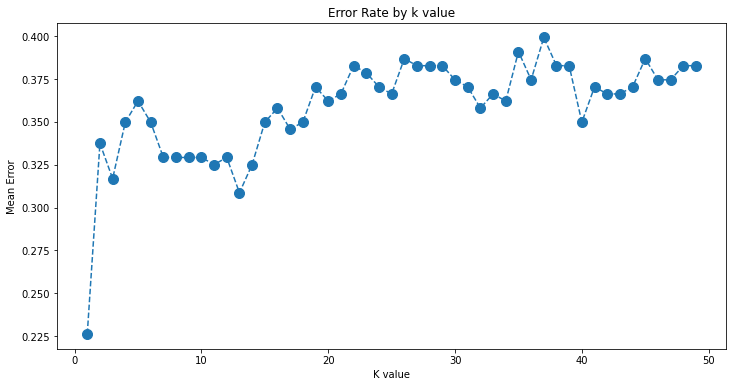

In [ ]:
# K-Neighbors Parameter with Chebyshev Distance Metric: Hyper-parameter tuning with four parameter algorithm
getScoresOfMetric("chebyshev")

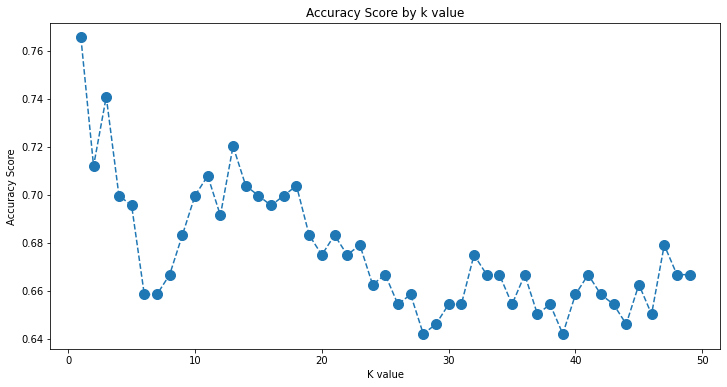

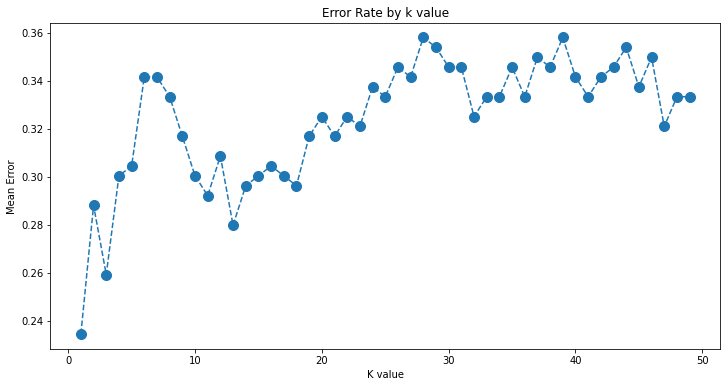

In [ ]:
# K-Neighbors Parameter with Minkowski Distance Metric: Hyper-parameter tuning with four parameter algorithm
getScoresOfMetric("minkowski")

> K-value is one of the most important hyper-parameters, and together with the error rates, we can choose an optimal k-value which will lead to our algorithm to give a much better results compared to now. On average, all models with different distance metrics gave similar results; however, the error rates in manhattan metric was the lowest, it also had high accuracy scores in general. Therefore, we decided to choose manhattan metric with the k-value of 1.

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       114
           1       0.80      0.76      0.78       129

    accuracy                           0.77       243
   macro avg       0.77      0.77      0.77       243
weighted avg       0.77      0.77      0.77       243



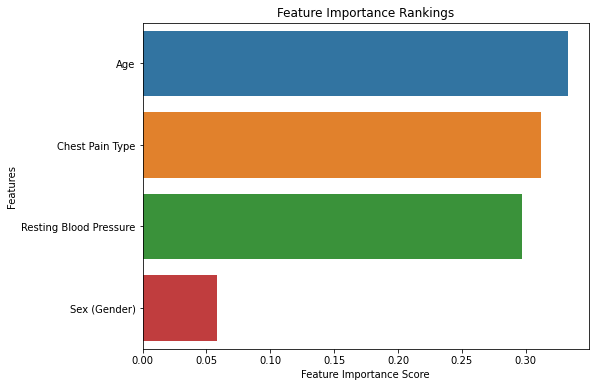

In [ ]:
# Rearranges the kNN model according to the result of the hyper-parameter tuning test
knn_model = KNeighborsClassifier(n_neighbors = 1, metric = "manhattan")
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

# Graphs the feature importance rankings
data_columns = ["Age", "Sex (Gender)", "Chest Pain Type", "Resting Blood Pressure"]
feature_importances = pd.Series(decision_tree_model.feature_importances_, index = data_columns).sort_values(ascending = False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

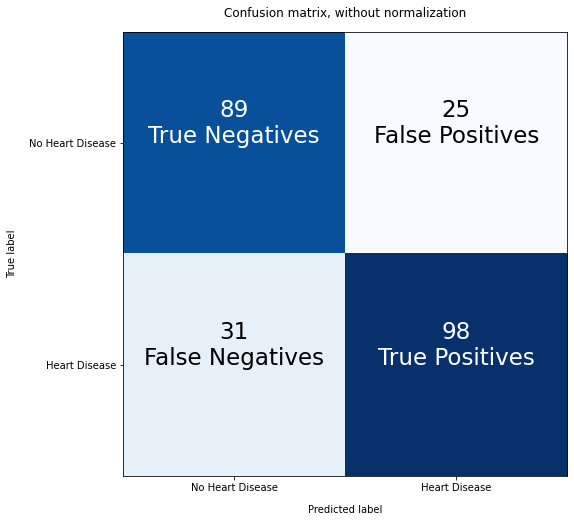

In [ ]:
# Confusion Matrix for updated kNN Model
getConfusionMatrix(y_test, y_pred)

> After hyper-parameter tuning operations, our model's scores in the classification report are increased, its accuracy score became 0.77 from 0.70. Similarly, its f1-score and precision is increased pretty well. Also, we have less false positives and false negatives meaning that there is less error.

##### Decision Tree and Random Forest algorithms and comparison of their performance

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       114
           1       0.80      0.76      0.78       129

    accuracy                           0.77       243
   macro avg       0.77      0.77      0.77       243
weighted avg       0.78      0.77      0.77       243



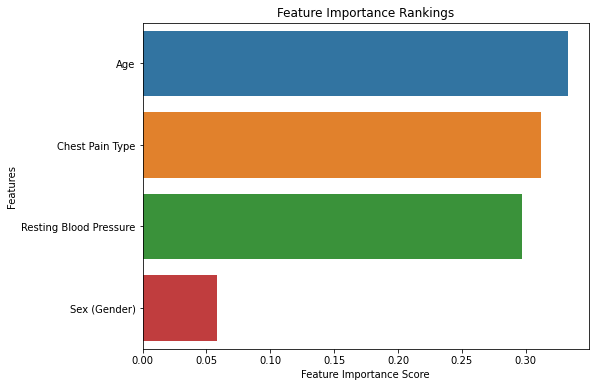

In [ ]:
# Decision Tree training with the main dataframe
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)
print(classification_report(y_test, y_pred))

# Graphs the feature importance rankings
data_columns = ["Age", "Sex (Gender)", "Chest Pain Type", "Resting Blood Pressure"]
feature_importances = pd.Series(decision_tree_model.feature_importances_, index = data_columns).sort_values(ascending = False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

> Decision tree has an accuracy of 0.77, which is equal to other model; its other classification report statistics such as f1-score and precision are also similar to the kNN model.

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       114
           1       0.84      0.83      0.83       129

    accuracy                           0.82       243
   macro avg       0.82      0.82      0.82       243
weighted avg       0.82      0.82      0.82       243



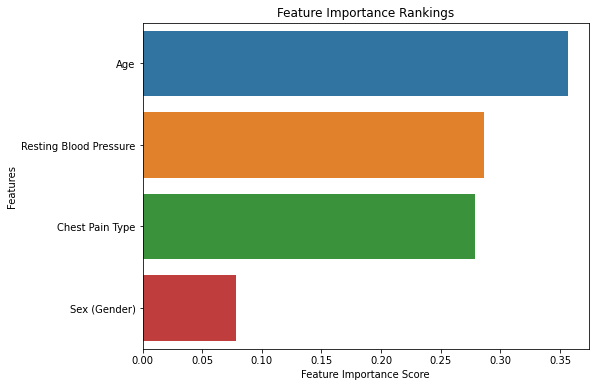

In [ ]:
# Random Forest Classifier training with the dataframe
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
y_pred = random_forest_model.predict(x_test)
print(classification_report(y_test, y_pred))

# Graphs the feature importance rankings
data_columns = ["Age", "Sex (Gender)", "Chest Pain Type", "Resting Blood Pressure"]
feature_importances = pd.Series(random_forest_model.feature_importances_, index = data_columns).sort_values(ascending = False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

> Random Forest model has an accuracy score of 0.82, which is the highest one by now. We can also try to increase its performance by hyper-parameter tuning.

Text(0, 0.5, 'Mean Error')

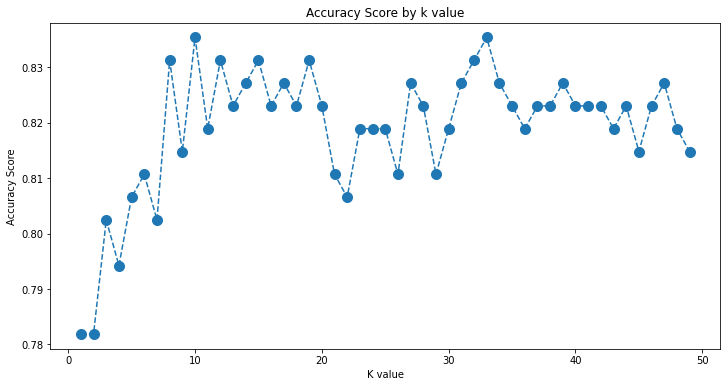

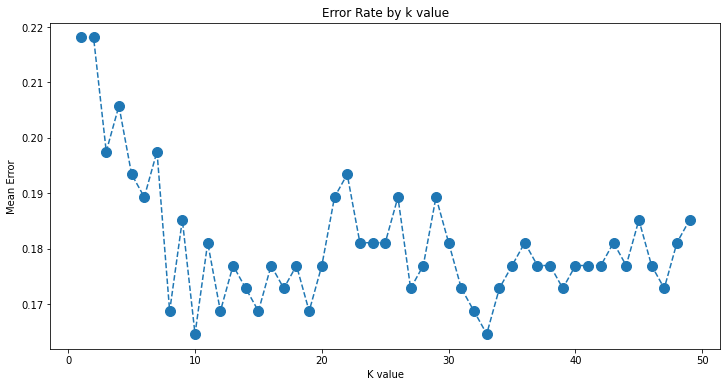

In [ ]:
# Max-Depth Parameter: Hyper-parameter tuning for random forest model
error = []
accuracy = []

for i in range(1, 50):
  random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = i)
  random_forest_model.fit(x_train, y_train)
  y_pred = random_forest_model.predict(x_test)
  error.append(np.mean(y_pred != y_test))
  accuracy.append(accuracy_score(y_test, y_pred))

plt.figure(figsize = (12, 6))
plt.plot(range(1, 50), accuracy, linestyle='dashed', marker='o', markersize=10)
plt.title('Accuracy Score by k value')
plt.xlabel('K value')
plt.ylabel('Accuracy Score')

plt.figure(figsize = (12, 6))
plt.plot(range(1, 50), error, linestyle='dashed', marker='o', markersize=10)
plt.title('Error Rate by k value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

> We can choose maximum depth as 10 so that both increase the accuracy level and decrease the error rate.

Text(0, 0.5, 'Mean Error')

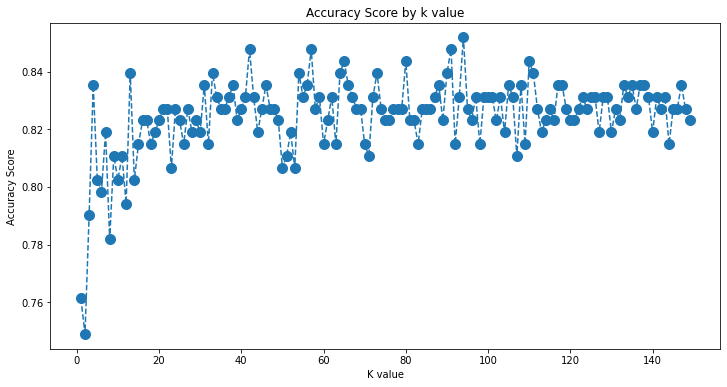

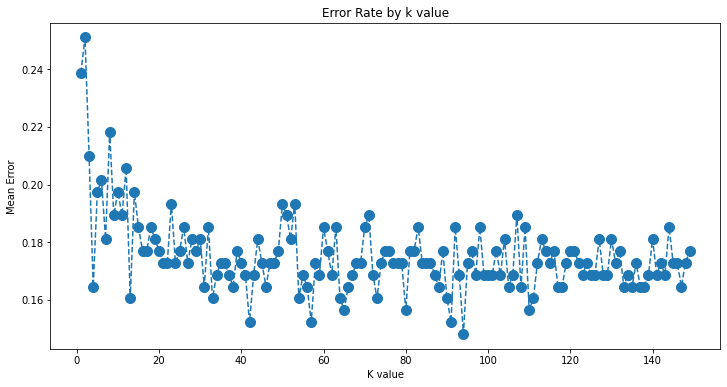

In [ ]:
# N-Estimators: Hyper-parameter tuning for random forest model
error = []
accuracy = []

for i in range(1, 150):
  random_forest_model = RandomForestClassifier(n_estimators = i, max_depth = 10)
  random_forest_model.fit(x_train, y_train)
  y_pred = random_forest_model.predict(x_test)
  error.append(np.mean(y_pred != y_test))
  accuracy.append(accuracy_score(y_test, y_pred))

plt.figure(figsize = (12, 6))
plt.plot(range(1, 150), accuracy, linestyle='dashed', marker='o', markersize=10)
plt.title('Accuracy Score by k value')
plt.xlabel('K value')
plt.ylabel('Accuracy Score')

plt.figure(figsize = (12, 6))
plt.plot(range(1, 150), error, linestyle='dashed', marker='o', markersize=10)
plt.title('Error Rate by k value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [ ]:
accuracy.index(max(accuracy))

93

> We found the max accuracy score on the 93, so that we can choose n_estimators as 93 which will lead to a better performance in our algorithm.

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       114
           1       0.83      0.86      0.85       129

    accuracy                           0.84       243
   macro avg       0.84      0.83      0.83       243
weighted avg       0.84      0.84      0.84       243



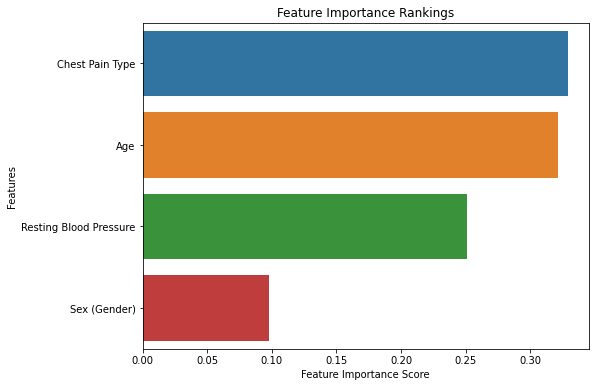

In [ ]:
# Random Forest Classifier training after hyper-parameter tuning operation
random_forest_model = RandomForestClassifier(n_estimators = 93, max_depth = 10)
random_forest_model.fit(x_train, y_train)
y_pred = random_forest_model.predict(x_test)
print(classification_report(y_test, y_pred))

# Graphs the feature importance rankings
data_columns = ["Age", "Sex (Gender)", "Chest Pain Type", "Resting Blood Pressure"]
feature_importances = pd.Series(random_forest_model.feature_importances_, index = data_columns).sort_values(ascending = False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

> After this hyper-parameter tuning, our model's accuracy score became 0.84, which is the highest score we got until now. It also has highest precision and f1-score values.

##### A prediction system whether a person could suffer from heart disease when provided with values of those attributes

In [ ]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0


In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 93, max_depth = 10)
random_forest_model.fit(x_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors = 10, leaf_size = 3, p = 1)
knn_model.fit(x_train, y_train)

def printPrediction(predictedVal):
  if (predictedVal == 0):
    print("No. According to our analysis, you don't have an important acquired heart disease risk.")
  else:
    print("Yes. According to our analysis, you are under an acquired heart disease risk, take care!")

def getPrediction(age, sex, chestPain, restBP):
  data =[[age, sex, chestPain, restBP]]
  df_prediction = pd.DataFrame(data, columns = ["Age", "Sex", "ChestPain", "RestBP"])
  y_pred = random_forest_model.predict(df_prediction)
  printPrediction(y_pred[0])

# y_pred = knn_model.predict(x_test.iloc[0:5])
# print(x_test.iloc[0:5])
# print(y_pred)

In [ ]:
# getPrediction(63, 1, 1, 145) -> No
# getPrediction(67, 1, 4, 160) -> No
# getPrediction(67, 1, 4, 120) -> Yes
# getPrediction(37, 1, 3, 130) -> No
# getPrediction(41, 0, 2, 130) -> No

In [ ]:
getPrediction(67, 1, 4, 120)

Yes. According to our analysis, you are under an acquired heart disease risk, take care!


In [ ]:
# Makes predictions according to the input given by the user
def getPredictionFromInput():
  age = int(input("Enter age: "))
  sex = int(input("Enter sex (female: 0, male: 1): "))
  chestPain = int(input("Enter chest pain type (typical: 1, nontypical: 2, nonanginal: 3, asymptomatic: 4): "))
  restBP = int(input("Enter resting blood pressure (in mmHg2): "))
  getPrediction(age, sex, chestPain, restBP)

In [ ]:
getPredictionFromInput()

Enter age: 20
Enter sex (female: 0, male: 1): 1
Enter chest pain type (typical: 1, nontypical: 2, nonanginal: 3, asymptomatic: 4): 1
Enter resting blood pressure (in mmHg2): 150
No. According to our analysis, you don't have an important acquired heart disease risk.
